## Bibliotecas e carregando os dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
import datetime as dt
import os
import folium

#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
#.preprocessing import Imputer
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.preprocessing import StandardScaler
#from sklearn.feature_selection import VarianceThreshold
#from sklearn.feature_selection import SelectFromModel
#from sklearn.utils import shuffle
#from sklearn.ensemble import RandomForestClassifier


pd.set_option('display.max_columns', 100)

month_num = str(10)
path_to_save = './Tempo-Clima/Analise_dados/'

if not os.path.exists(str(path_to_save+month_num)):
    os.makedirs(str(path_to_save+month_num))
    os.makedirs(str(path_to_save+month_num+'/recovery_data_analise/'))
data = pd.read_csv('./Tempo-Clima/Dados/EMA/Unidos_v2/Brasil_v2/Brasil_'+month_num+'_v4.csv')
#data = data.drop(columns=['Unnamed: 0.1','Unnamed: 0','Unnamed: 0.1.1','Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1'])

# Qual o tamanho da base?

In [3]:
data.shape

(3147984, 29)

# Retirando duplicações de dados e verificando o tamanho novamente

In [4]:
data.drop_duplicates()
data.shape

(3147984, 29)

# Informações da base

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147984 entries, 0 to 3147983
Data columns (total 29 columns):
Altitude(metros)                              float64
Codigo OMM                                    float64
Day                                           int64
H(UTC)                                        int64
Latitude                                      float64
Longitude                                     float64
Month                                         int64
Nome                                          object
PRECIPITACAO (mm)                             float64
PRESSAO ATMOSFERICA (hPa)                     float64
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              float64
PRESSAO ATMOSFÉRICA MINIMA (hPa)              float64
RADIACAO GLOBAL (KJ/M2)                       float64
TEMPERATURA DO AR (C)                         float64
TEMPERATURA DO PONTO DE ORVALHO (C)           float64
TEMPERATURA MAXIMA (C)                        float64
TEMPERATURA MINIMA (C)        

In [6]:
data.describe().T

count          mean  \
Altitude(metros)                            3147984.0    344.562311   
Codigo OMM                                  3147240.0  85358.044618   
Day                                         3147984.0     16.019937   
H(UTC)                                      3147984.0     11.500000   
Latitude                                    3147984.0    -15.859639   
Longitude                                   3147984.0    -47.742004   
Month                                       3147984.0     10.000000   
PRECIPITACAO (mm)                           2863252.0      0.135907   
PRESSAO ATMOSFERICA (hPa)                   2917753.0    965.684346   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            2916846.0    965.996777   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            2916849.0    965.379294   
RADIACAO GLOBAL (KJ/M2)                     1549828.0   1508.073219   
TEMPERATURA DO AR (C)                       2928130.0     24.372124   
TEMPERATURA DO PONTO DE ORVALHO (C)         2906750.0     16.937800   
TEMPERATURA MAXIMA (C)                      2927722.0     25.039034   
TEMPERATURA MINIMA (C)                      2927620.0     23.737614   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  2906757.0     17.482582   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  2905551.0     16.408681   
UMIDADE RELATIVA DO AR (%)                  2909972.0     67.644511   
UMIDADE RELATIVA DO MAXIMA AR (%)           2909261.0     70.451611   
UMIDADE RELATIVA DO MINIMA AR (%)           2907710.0     64.757913   
VENTO VELOCIDADE                            2873640.0      2.443596   
VENTO, DIRECAO (graus)                      2853456.0    144.866331   
VENTO, RAJADA MAXIMA (m/s)                  2872441.0      5.679592   
Year                                        3147984.0   2010.802060   

                                                    std           min  \
Altitude(metros)                             288.257307      1.001000   
Codigo OMM                                  2259.185993  81609.000000   
Day                                            8.946363      1.000000   
H(UTC)                                         6.922188      0.000000   
Latitude                                       8.147914    -33.742297   
Longitude                                      6.928762    -72.786778   
Month                                          0.000000     10.000000   
PRECIPITACAO (mm)                              1.164422      0.000000   
PRESSAO ATMOSFERICA (hPa)                     37.935172    807.900000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              37.949604    808.200000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              37.928235    807.000000   
RADIACAO GLOBAL (KJ/M2)                     1187.160239      0.000000   
TEMPERATURA DO AR (C)                          5.531683     -7.700000   
TEMPERATURA DO PONTO DE ORVALHO (C)            4.297468    -35.200000   
TEMPERATURA MAXIMA (C)                         5.696625     -6.200000   
TEMPERATURA MINIMA (C)                         5.362604     -8.700000   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     4.203295    -22.100000   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     4.403071    -35.000000   
UMIDADE RELATIVA DO AR (%)                    21.277852     10.000000   
UMIDADE RELATIVA DO MAXIMA AR (%)             20.636984      3.000000   
UMIDADE RELATIVA DO MINIMA AR (%)             21.739369      3.000000   
VENTO VELOCIDADE                               1.885665      0.000000   
VENTO, DIRECAO (graus)                        96.439043      1.000000   
VENTO, RAJADA MAXIMA (m/s)                     3.236071      0.000000   
Year                                           3.026708   2000.000000   

                                                     25%           50%  \
Altitude(metros)                               75.000000    290.000000   
Codigo OMM                                  81976.000000  86731.000000   
Day                                             8.000000     16.000000   
H(UTC)

In [7]:
data.head(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)  Latitude  Longitude  Month  \
0             185.0     81963.0    1       0 -9.358353 -69.926257     10   
1             185.0     81963.0    1       1 -9.358353 -69.926257     10   
2             185.0     81963.0    1       2 -9.358353 -69.926257     10   
3             185.0     81963.0    1       3 -9.358353 -69.926257     10   
4             185.0     81963.0    1       4 -9.358353 -69.926257     10   

                             Nome  PRECIPITACAO (mm)  \
0  Parque Estadual Chandless-A102                0.0   
1  Parque Estadual Chandless-A102                0.0   
2  Parque Estadual Chandless-A102                0.0   
3  Parque Estadual Chandless-A102                0.0   
4  Parque Estadual Chandless-A102                0.0   

   PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
0                      989.2                             989.2   
1                      990.4                             990.4   
2                      991.1                             991.1   
3                      991.2                             992.0   
4                      991.1                             991.3   

   PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
0                             988.2                      NaN   
1                             989.2                      NaN   
2                             990.4                      NaN   
3                             991.1                      NaN   
4                             990.8                      NaN   

   TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
0                   23.4                                 22.6   
1                   23.3                                 22.5   
2                   23.0                                 22.3   
3                   23.6                                 22.2   
4                   22.9                                 22.1   

   TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
0                    23.9                    23.3   
1                    23.6                    23.0   
2                    23.3                    22.9   
3                    23.7                    23.0   
4                    23.7                    22.9   

   TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
0                                        22.9   
1                                        22.7   
2                                        22.5   
3                                        22.6   
4                                        22.3   

   TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  UMIDADE RELATIVA DO AR (%)  \
0                                        22.5                        95.0   
1                                        22.2                        95.0   
2                                        22.1                        95.0   
3                                        22.1                        92.0   
4                                        22.1                        95.0   

   UMIDADE RELATIVA DO MAXIMA AR (%)  UMIDADE RELATIVA DO MINIMA AR (%)  \
0                               95.0                               94.0   
1                               96.0                               95.0   
2                               96.0                               95.0   
3                               96.0                               92.0   
4                               95.0                               92.0   

   VENTO VELOCIDADE   VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  \
0                0.2                    23.0                         1.1   
1                0.8                    39.0                         1.7   
2                0.4                    34.0                         1.7   
3                0.5                    25.0                         4.2   
4                0.6                   243.0                         1.8   

   Year                     Cidade Estado Regiao  


In [8]:
data.tail(5)

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
3147979               6.0     86618.0   31      19 -10.473959 -36.482051   
3147980               6.0     86618.0   31      20 -10.473959 -36.482051   
3147981               6.0     86618.0   31      21 -10.473959 -36.482051   
3147982               6.0     86618.0   31      22 -10.473959 -36.482051   
3147983               6.0     86618.0   31      23 -10.473959 -36.482051   

         Month               Nome  PRECIPITACAO (mm)  \
3147979     10  Brejo Grande-A421                0.0   
3147980     10  Brejo Grande-A421                0.0   
3147981     10  Brejo Grande-A421                0.0   
3147982     10  Brejo Grande-A421                0.0   
3147983     10  Brejo Grande-A421                0.0   

         PRESSAO ATMOSFERICA (hPa)  PRESSAO ATMOSFÉRICA MAXIMA (hPa)  \
3147979                     1013.1                            1013.3   
3147980                     1013.5                            1013.5   
3147981                     1013.9                            1013.9   
3147982                     1014.0                            1014.0   
3147983                     1014.3                            1014.3   

         PRESSAO ATMOSFÉRICA MINIMA (hPa)  RADIACAO GLOBAL (KJ/M2)  \
3147979                            1013.0                 1188.396   
3147980                            1013.1                  452.978   
3147981                            1013.4                   17.910   
3147982                            1013.8                      NaN   
3147983                            1014.0                      NaN   

         TEMPERATURA DO AR (C)  TEMPERATURA DO PONTO DE ORVALHO (C)  \
3147979                   28.2                                 18.8   
3147980                   26.4                                 18.7   
3147981                   25.5                                 19.4   
3147982                   25.5                                 19.5   
3147983                   25.3                                 19.8   

         TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
3147979                    29.2                    27.4   
3147980                    28.2                    26.4   
3147981                    26.4                    25.5   
3147982                    25.7                    25.4   
3147983                    25.6                    25.3   

         TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
3147979                                        19.6   
3147980                                        19.0   
3147981                                        19.7   
3147982                                        19.7   
3147983                                        19.8   

         TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
3147979                                        18.3   
3147980                                        17.6   
3147981                                        18.7   
3147982                                        19.3   
3147983                                        19.4   

         UMIDADE RELATIVA DO AR (%)  UMIDADE RELATIVA DO MAXIMA AR (%)  \
3147979                        57.0                               62.0   
3147980                        63.0                               64.0   
3147981                        69.0                               69.0   
3147982                        70.0                               70.0   
3147983                        72.0                               72.0   

         UMIDADE RELATIVA DO MINIMA AR (%)  VENTO VELOCIDADE   \
3147979                               52.0                3.9   
3147980                               55.0                3.1   
3147981                               63.0                2.3   
3147982                               68.0                2.6   
3147983                               69.0                2.1   

         VENTO, DIRECAO (graus)  VENTO, RAJADA MAXIMA (m/s)  Year  \
3147979     

# Temos muitos dados ausentes?

In [9]:
(data.isnull().sum()/len(data))*100

Altitude(metros)                               0.000000
Codigo OMM                                     0.023634
Day                                            0.000000
H(UTC)                                         0.000000
Latitude                                       0.000000
Longitude                                      0.000000
Month                                          0.000000
Nome                                           0.000000
PRECIPITACAO (mm)                              9.044900
PRESSAO ATMOSFERICA (hPa)                      7.313601
PRESSAO ATMOSFÉRICA MAXIMA (hPa)               7.342413
PRESSAO ATMOSFÉRICA MINIMA (hPa)               7.342318
RADIACAO GLOBAL (KJ/M2)                       50.767602
TEMPERATURA DO AR (C)                          6.983962
TEMPERATURA DO PONTO DE ORVALHO (C)            7.663127
TEMPERATURA MAXIMA (C)                         6.996922
TEMPERATURA MINIMA (C)                         7.000163
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     7

In [10]:
data.dropna().shape

(1451751, 29)

In [11]:
data.shape[0] - data.dropna().shape[0]

1696233

In [12]:
((data<0).sum()/len(data))*100

Altitude(metros)                                0.000000
Codigo OMM                                      0.000000
Day                                             0.000000
H(UTC)                                          0.000000
Latitude                                       99.243706
Longitude                                     100.000000
Month                                           0.000000
Nome                                          100.000000
PRECIPITACAO (mm)                               0.000000
PRESSAO ATMOSFERICA (hPa)                       0.000000
PRESSAO ATMOSFÉRICA MAXIMA (hPa)                0.000000
PRESSAO ATMOSFÉRICA MINIMA (hPa)                0.000000
RADIACAO GLOBAL (KJ/M2)                         0.000000
TEMPERATURA DO AR (C)                           0.000318
TEMPERATURA DO PONTO DE ORVALHO (C)             0.055210
TEMPERATURA MAXIMA (C)                          0.000127
TEMPERATURA MINIMA (C)                          0.000826
TEMPERATURA MÁXIMA DO PONTO DE 

# Matriz de correlação dos dados

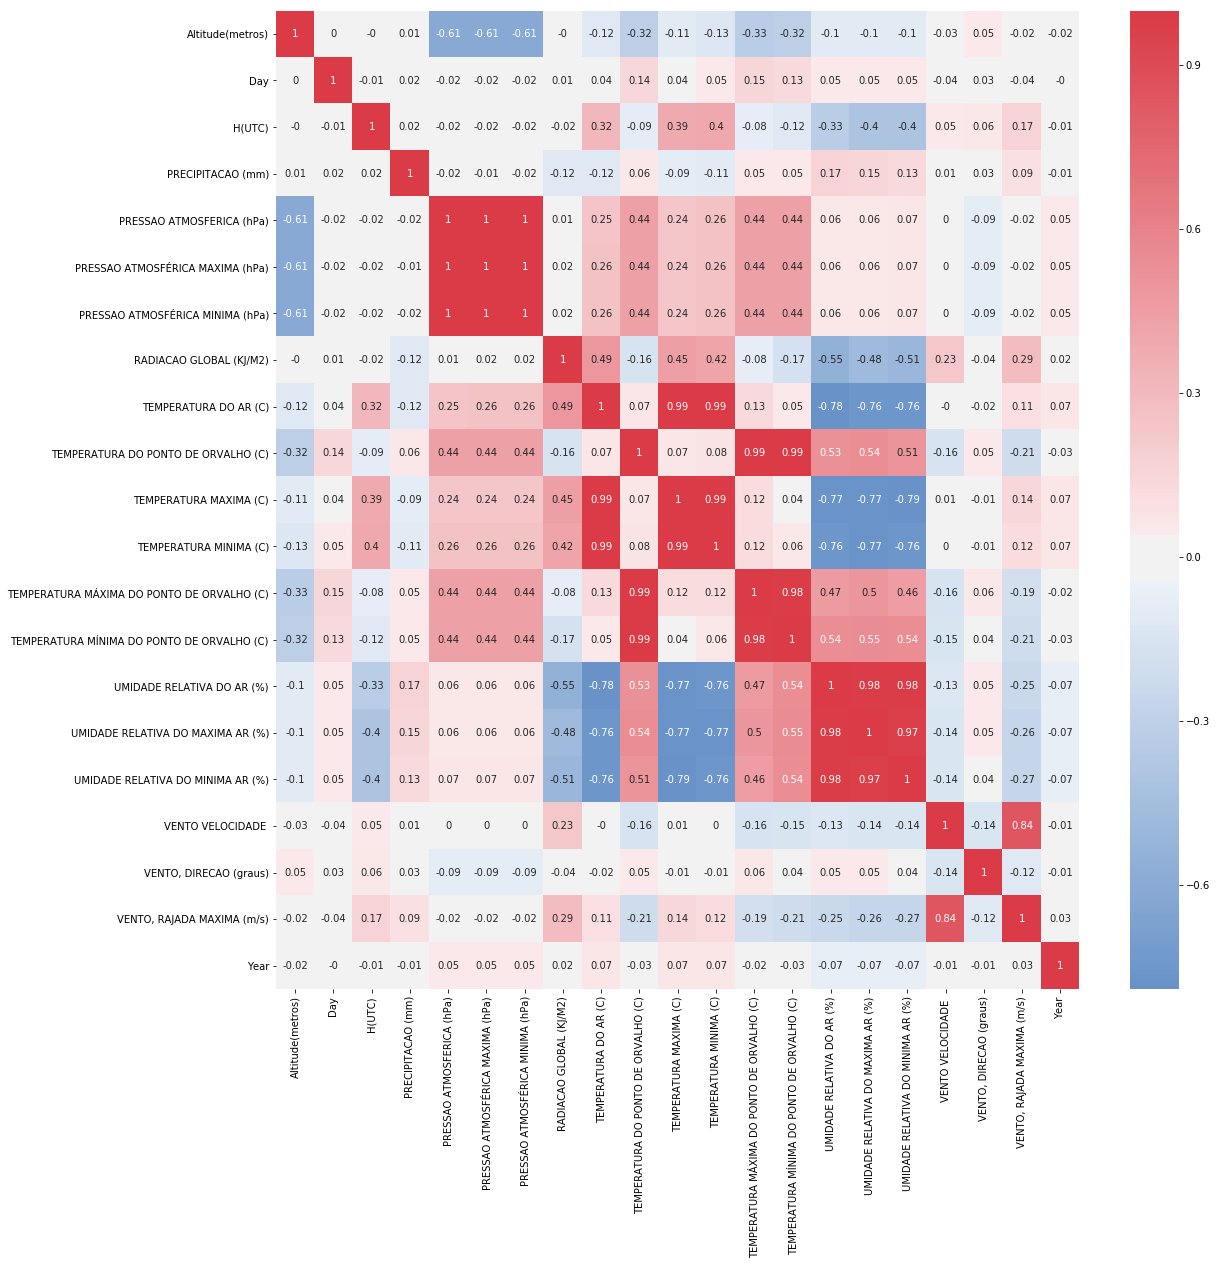

In [15]:
all_columns_num = data.columns.tolist()
all_columns_num.remove('Nome')
all_columns_num.remove('Month')
all_columns_num.remove('Latitude')
all_columns_num.remove('Longitude')
all_columns_num.remove('Codigo OMM')
all_columns_num.remove('Cidade')
all_columns_num.remove('Estado')
all_columns_num.remove('Regiao')
data_clean = data.dropna()
cor_matrix = data_clean[all_columns_num].corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

## Fazendo um mapa para verificar como esta cada estação em relação a dados ausentes e a consistencias dos dados

In [16]:
def make_marker(name,lat,long,alt, temp_min,temp_max, temp_min_min,temp_min_max,
                temp_max_min,temp_max_max, prep_min,prep_max, ur_min,ur_max,
                ur_min_min,ur_min_max, ur_max_min,ur_max_max, miss_data_temp_min,
                miss_data_temp_max, miss_data_prep, miss_data_ur_min, miss_data_ur_max,
                miss_data_ur,color):
    return folium.Marker(location=[df_temp['Latitude'].unique()[0],df_temp['Longitude'].unique()[0]], 
                 popup='''
                 Name: {:s}
                 Latitude:{:f}
                 longitude:{:f}
                 Altitude(metros) : {:f}
                 Minimos e Maximos
                 
                 Temperatura do ar: {:f}\t{:f}
                 Temperatura Minima: {:f}\t{:F}
                 Temperatura Maxima:  {:f}\t{:f}
                 Precipitação: {:f}\t{:f}
                 Umidade Relativa: {:f}\t{:f}
                 UR Minima: {:f}\t{:f}
                 UR Maxima: {:f}\t{:f}
                 
                 Dados Ausentes
                 
                 Temperatura Minima: {:f}
                 Temperatura Maxima: {:f}
                 Precipitação: {:f}
                 UR Minima: {:f}
                 UR Maxima: {:f}
                 UR:{:f}
                 '''.format(name,lat,long,alt,
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur), 
                icon=folium.Icon(color=color))

### Problemas procurados

##### - Temperatura minima              > Temperatura Maxima
##### - Temperatura(min,max,do ar)      < 0 OU Temperatura(min,max,do ar)>45
##### - Temperatura minima do Ponto de Orvalho              > Temperatura Maxima do Ponto de Orvalho
##### - Temperatura do Ponto de Orvalho(min,max,do ar)      < 0 OU Temperatura(min,max,do ar)>45
##### - Umidade Relativa(min,max,do ar) < 0 OU Umidade Relativa(min,max,do ar)   >100
##### - Umidade relativa minima         > Umidade relativa maxima
##### - Dados ausentes > 30

In [17]:
#Grupo de marcadores para possivel problemas
fg_miss_data          =      folium.FeatureGroup(name='Miss Data')
fg_temp_inconsistency =      folium.FeatureGroup(name='Temp correlation Inconsistency')
fg_temp_min           =      folium.FeatureGroup(name='Temp minima Inconsistency')
fg_temp               =      folium.FeatureGroup(name='Temp air Inconsistency')
fg_temp_max           =      folium.FeatureGroup(name='Temp Maxima Inconsistency')
fg_ur_inconsistency   =      folium.FeatureGroup(name='Umildade Relatica Inconsistency')

df_miss_data = pd.DataFrame(columns = ['Estação','Md_temp_max','Md_temp_min','Md_temp','Md_ur_max','Md_ur_min','MD_ur','Md_prec'])

recovery_list = []
danger_list = []
temp_min_list = []
temp_max_list = []
temp_inconsistency_list = []
temp_list = []
ur_list = []

for name in data['Nome'].unique().tolist():
    
    df_temp = data.loc[lambda df: df.Nome == name, :]
    #Maximo e minimos
    temp_min     = df_temp['TEMPERATURA DO AR (C)'].min()
    temp_max     = df_temp['TEMPERATURA DO AR (C)'].max()
    temp_min_min = df_temp['TEMPERATURA MINIMA (C)'].min()
    temp_min_max = df_temp['TEMPERATURA MINIMA (C)'].max()
    temp_max_min = df_temp['TEMPERATURA MAXIMA (C)'].min()
    temp_max_max = df_temp['TEMPERATURA MAXIMA (C)'].max()
    prep_max     = df_temp['PRECIPITACAO (mm)'].max()
    prep_min     = df_temp['PRECIPITACAO (mm)'].min()
    ur_max       = df_temp['UMIDADE RELATIVA DO AR (%)'].max()
    ur_min       = df_temp['UMIDADE RELATIVA DO AR (%)'].min()
    ur_max_max   = df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].max()
    ur_max_min   = df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].min()
    ur_min_max   = df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].max()
    ur_min_min   = df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].min()
    #Dados ausentes
    miss_data_temp     = (df_temp['TEMPERATURA DO AR (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA DO AR (C)']))*100
    miss_data_temp_min = (df_temp['TEMPERATURA MINIMA (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA MINIMA (C)']))*100
    miss_data_temp_max = (df_temp['TEMPERATURA MAXIMA (C)'].isnull().sum()/
                          len(df_temp['TEMPERATURA MAXIMA (C)']))*100
    miss_data_prep     = (df_temp['PRECIPITACAO (mm)'].isnull().sum()/
                          len(df_temp['PRECIPITACAO (mm)']))*100
    miss_data_ur_min   = (df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO MINIMA AR (%)']))*100
    miss_data_ur_max   = (df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)']))*100
    miss_data_ur       = (df_temp['UMIDADE RELATIVA DO AR (%)'].isnull().sum()/
                          len(df_temp['UMIDADE RELATIVA DO AR (%)']))*100
    #Estações com 10% a 50% de dados ausentes poderão ser interpolados
    miss_recovery = (miss_data_temp> 10 and miss_data_temp < 30,
                      miss_data_temp_min> 10 and miss_data_temp_min < 30,
                      miss_data_prep > 10 and miss_data_prep< 30,
                      miss_data_temp_max > 10 and miss_data_temp_max < 30,
                      miss_data_ur > 10 and miss_data_ur < 30,
                      miss_data_ur_max > 10 and miss_data_ur_max < 30,
                      miss_data_ur_min > 10 and miss_data_ur_min < 30)
    #Estações com 50% ou mais de dados ausentes poderam ser eliminadas
    miss_danger = (miss_data_temp > 30,miss_data_temp_min> 30,miss_data_prep> 30,
                   miss_data_temp_max> 30,miss_data_ur> 30,
                   miss_data_ur_max> 30,miss_data_ur_min > 30)
    
    df_miss_data = df_miss_data.append(pd.DataFrame([name,miss_data_temp_max,miss_data_temp_min,miss_data_temp,miss_data_ur_max,
              miss_data_ur_min,miss_data_ur,miss_data_prep], index = df_miss_data.columns.tolist()).T)
    if miss_danger == (1,1,1,1,1,1,1):
        color = 'red'
        danger_list.append(name)
    elif True in miss_recovery:
        color = 'purple'
        recovery_list.append(name)
    else:
        color = 'green'
    fg_miss_data.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
        
    temp_inconsistency = (df_temp['TEMPERATURA MAXIMA (C)'] <= df_temp['TEMPERATURA MINIMA (C)'])
    
    if True in temp_inconsistency:
        color = 'red'
        temp_inconsistency_list.append(name)
    else:
        color = 'green'
    fg_temp_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_max_min < 0) or (temp_max_max > 45):
        color = 'red'
        temp_max_list.append(name)
    else:
        color = 'green'
    fg_temp_max.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_min < 0) or (temp_max > 45):
        color = 'red'
        temp_list.append(name)
    else:
        color = 'green'
    fg_temp_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    if (temp_min_min < 0) or (temp_min_max > 45):
        color = 'red'
        temp_min_list.append(name)
    else:
        color = 'green'
    
    fg_temp_min.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))
    
    ur_min_danger = (ur_min < 0, ur_max_min < 0, ur_min_min < 0 )
    ur_max_danger = (ur_max >100,ur_max_max>100,ur_min_max>100)
    ur_inconsistency = (df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)'] <= df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'])
   
    if (True in ur_min_danger) or (True in ur_max_danger) or (True in ur_inconsistency):
        color = 'red'
        ur_list.append(name)
    else:
        color = 'green'
    fg_ur_inconsistency.add_child(make_marker(name,df_temp['Latitude'].unique()[0],
                            df_temp['Longitude'].unique()[0],
                            df_temp['Altitude(metros)'].unique()[0],
                            temp_min,temp_max,
                            temp_min_min,temp_min_max,
                            temp_max_min,temp_max_max,
                            prep_min,prep_max,
                            ur_min,ur_max,
                            ur_min_min,ur_min_max,
                            ur_max_min,ur_max_max,
                            miss_data_temp_min,
                            miss_data_temp_max,
                            miss_data_prep,
                            miss_data_ur_min,
                            miss_data_ur_max,
                            miss_data_ur,color))

map_miss_data          = folium.Map()
map_temp_inconsistency = folium.Map()
map_temp_min           = folium.Map()
map_temp_max           = folium.Map()
map_ur_inconsistency   = folium.Map()
map_miss_data.add_child(fg_miss_data).save(str(path_to_save+month_num+'/map_'+month_num+'_miss_data.html'))
map_temp_inconsistency.add_child(fg_temp_inconsistency).save(path_to_save+month_num+'/map_'+month_num+'_temp_incosistency.html')
map_temp_min.add_child(fg_temp_min).save(path_to_save+month_num+'/map_'+month_num+'_temp_min.html')
map_temp_max.add_child(fg_temp_max).save(path_to_save+month_num+'/map_'+month_num+'_temp_max.html')
map_ur_inconsistency.add_child(fg_ur_inconsistency).save(path_to_save+month_num+'/map_'+month_num+'_ur_incosistency.html')

df_miss_data = df_miss_data.reset_index(drop=True)
df_miss_data.to_csv(str(path_to_save+month_num+'/'+'Data_miss.csv'))

# Analisando as possiveis incosistencia nos dados 
## Verificando os dados da Umidade relativa

In [18]:
len(ur_list)

1

In [19]:
ur_list

['Parque Estadual Chandless-A102']

In [20]:
df_temp = data.loc[lambda df: df.Nome == ur_list[0], :].reset_index()
errors = df_temp.loc[df_temp['UMIDADE RELATIVA DO MAXIMA AR (%)']<=df_temp['UMIDADE RELATIVA DO MINIMA AR (%)'],:]['index'].tolist()
data.iloc[errors][['UMIDADE RELATIVA DO MAXIMA AR (%)','UMIDADE RELATIVA DO MINIMA AR (%)','UMIDADE RELATIVA DO AR (%)']].count()

UMIDADE RELATIVA DO MAXIMA AR (%)    865
UMIDADE RELATIVA DO MINIMA AR (%)    865
UMIDADE RELATIVA DO AR (%)           865
dtype: int64

Como podemos ver os dados de umidade estão todos iguais nestes registros, por isso iremos retila-los

In [21]:
data.loc[errors,'UMIDADE RELATIVA DO MAXIMA AR (%)'] = np.nan
data.loc[errors,'UMIDADE RELATIVA DO MINIMA AR (%)'] = np.nan
data.loc[errors,'UMIDADE RELATIVA DO AR (%)'] = np.nan

## Incosistencia nos dados de temperatura

In [22]:
temp_inconsistency_list

['Parque Estadual Chandless-A102']

### Foi encontrado apenas uma estação com incosistencia de dados de temperatura, vamos ver estes erros

In [23]:
df_temp = data.loc[lambda df: df.Nome == 'Parque Estadual Chandless-A102', :].reset_index()
errors = df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<=df_temp['TEMPERATURA MINIMA (C)'],:]['index'].tolist()
data.iloc[errors].count()

Altitude(metros)                              3
Codigo OMM                                    3
Day                                           3
H(UTC)                                        3
Latitude                                      3
Longitude                                     3
Month                                         3
Nome                                          3
PRECIPITACAO (mm)                             3
PRESSAO ATMOSFERICA (hPa)                     3
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              3
PRESSAO ATMOSFÉRICA MINIMA (hPa)              3
RADIACAO GLOBAL (KJ/M2)                       1
TEMPERATURA DO AR (C)                         3
TEMPERATURA DO PONTO DE ORVALHO (C)           3
TEMPERATURA MAXIMA (C)                        3
TEMPERATURA MINIMA (C)                        3
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)    3
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)    3
UMIDADE RELATIVA DO AR (%)                    1
UMIDADE RELATIVA DO MAXIMA AR (%)       

#### Apenas uma estação foi encontrada com incosistencia na temperatura, e este problema é por causa que os dados de temperatura estão todos iguais

In [24]:
data.loc[errors,'TEMPERATURA DO AR (C)'] = np.nan
data.loc[errors,'TEMPERATURA MAXIMA (C)'] = np.nan
data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan

## Possiveis erros de temperatura maxima

In [25]:
len(temp_max_list)

2

In [26]:
temp_max_list

['Goiânia-A002', 'Morro da Igreja (Bom Jardim da Serra)-A845']

In [27]:
map_temp_max

#### Como temos muitas estações com possiveis registros de baixas temperaturas, vamos olhar o numero de registros que cada uma tem para saber se isso é correcorrente, se isso se repete em outros anos e em qual região do Brasil esta a estação

In [28]:
for name in temp_max_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{} Tmin: {} Tmax: {} \nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['TEMPERATURA MINIMA (C)'].min(),df_temp['TEMPERATURA MINIMA (C)'].max(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Goiânia-A002'] Numero de Registross: 5 Região/Estado: ['Centro Oeste']/['Goias'] Tmin: -8.7 Tmax: 38.3 
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015]

Estação: ['Morro da Igreja (Bom Jardim da Serra)-A845'] Numero de Registross: 390 Região/Estado: ['Sul']/['Santa Catarina'] Tmin: -7.7 Tmax: 21.9 
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015]



In [29]:
for name in temp_max_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{}\nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Goiânia-A002'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Goias']
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015]

Estação: ['Morro da Igreja (Bom Jardim da Serra)-A845'] Numero de Registross: 0 Região/Estado: ['Sul']/['Santa Catarina']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015]



In [30]:
df_temp = data.loc[lambda df: df.Nome == temp_max_list[0], :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','UMIDADE RELATIVA DO AR (%)','Year','Day','H(UTC)','Nome']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  TEMPERATURA DO AR (C)  \
429779                     NaN                    -6.2                   -6.6   
429838                     NaN                    -4.5                    NaN   
429988                     NaN                    -1.8                    NaN   
430224                     NaN                     2.2                    NaN   
430260                     NaN                     3.8                    NaN   

        UMIDADE RELATIVA DO AR (%)  Year  Day  H(UTC)          Nome  
429779                        79.0  2008    4      11  Goiânia-A002  
429838                        75.0  2008    6      22  Goiânia-A002  
429988                        64.0  2008   13       4  Goiânia-A002  
430224                        70.0  2008   23       0  Goiânia-A002  
430260                        66.0  2008   24      12  Goiânia-A002

In [31]:
df_temp = data.loc[lambda df: df.Nome ==temp_max_list[1], :]
df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:][['TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Nome','Regiao','Estado','Altitude(metros)','UMIDADE RELATIVA DO AR (%)']]

TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
1279300                     3.4                     4.1   
1279301                     3.1                     3.6   
1279302                     2.6                     3.2   
1279303                     2.7                     3.0   
1279304                     2.7                     3.0   
1279305                     2.6                     2.8   
1279306                     2.7                     3.3   
1279307                     3.3                     4.2   
1279329                     4.5                     4.8   
1279330                     4.4                     4.6   
1280163                     3.8                     4.8   
1280164                     3.7                     4.5   
1280165                     3.2                     4.3   
1280207                     4.2                     4.5   
1280208                     4.1                     4.2   
1280209                     3.6                     4.1   
1280210                     3.3                     3.6   
1280211                     2.3                     3.4   
1280212                     1.2                     2.3   
1280213                     1.0                     3.6   
1280214                     1.1                     3.9   
1280215                     1.1                     3.2   
1280216                     1.1                     2.7   
1280217                     2.4                     2.6   
1280218                     2.4                     2.8   
1280219                     2.8                     4.3   
1280221                     2.2                     4.2   
1280222                     1.8                     3.9   
1280223                     3.1                     4.8   
1280226                     2.9                     3.8   
...                         ...                     ...   
1284585                     3.3                     3.5   
1284586                     3.1                     3.4   
1284587                     3.3                     3.5   
1284588                     3.0                     3.5   
1284589                     3.2                     3.9   
1284590                     3.7                     4.8   
1284599                     4.4                     4.7   
1284600                     4.3                     4.7   
1284601                     4.1                     4.5   
1284602                     4.5                     4.8   
1284603                     4.6                     4.8   
1284604                     3.7                     4.7   
1284605                     3.3                     3.7   
1284606                     3.3                     3.6   
1284607                     3.4                     3.8   
1284608                     3.4                     3.6   
1284609                     3.4                     3.7   
1284610                     3.2                     3.6   
1284611                     3.4                     4.4   
1284612                     3.9                     4.6   
1284627                     4.2                     4.4   
1284628                     4.3                     4.8   
1284629                     3.8                     4.8   
1284630                     3.8                     4.0   
1284631                     3.7                     4.3   
1284632                     3.7                     4.3   
1284633                     3.1                     3.8   
1284634                     3.3                     3.7   
1284635                     3.6                     4.7   
1284988                     NaN                     4.8   

         TEMPERATURA DO AR (C)  Year  Day  H(UTC)  \
1279300                    3.6  2007    1       4   
1279301                    3.1  2007    1       5   
1279302                    2.7  2007    1       6   
1279303                    2.9  2007    1       7   
1279304                    2.8  2007    1       8   
1279305                    2.7  

In [32]:
for name in ['Goiânia-A002']:
    df_temp = data.loc[lambda df: df.Nome == name, :].reset_index()
    errors = df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']<5,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MAXIMA (C)'] = np.nan
    errors = df_temp.loc[df_temp['TEMPERATURA MAXIMA (C)']>40,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MAXIMA (C)'] = np.nan

## Possiveis erros de temperatura minima

In [33]:
len(temp_min_list)

2

In [34]:
temp_min_list

['Goiânia-A002', 'Morro da Igreja (Bom Jardim da Serra)-A845']

In [35]:
map_temp_min

In [36]:
for name in temp_min_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{}\nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Goiânia-A002'] Numero de Registross: 12 Região/Estado: ['Centro Oeste']/['Goias']
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015]

Estação: ['Morro da Igreja (Bom Jardim da Serra)-A845'] Numero de Registross: 647 Região/Estado: ['Sul']/['Santa Catarina']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015]



In [37]:
for name in temp_max_list:
    df_temp = data.loc[lambda df: df.Nome == name, :]
    print('Estação: {} Numero de Registross: {} Região/Estado: {}/{}\nAnos: {}\n'.format(df_temp['Nome'].unique(),
                                                                                      len(df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40]),
                                                                                      df_temp['Regiao'].unique(),df_temp['Estado'].unique(),
                                                                                      df_temp['Year'].unique()))

Estação: ['Goiânia-A002'] Numero de Registross: 0 Região/Estado: ['Centro Oeste']/['Goias']
Anos: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015]

Estação: ['Morro da Igreja (Bom Jardim da Serra)-A845'] Numero de Registross: 0 Região/Estado: ['Sul']/['Santa Catarina']
Anos: [2007 2008 2009 2010 2011 2012 2013 2014 2015]



In [38]:
df_temp = data.loc[lambda df: df.Nome == temp_min_list[0], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)']]

Nome  TEMPERATURA MINIMA (C)  TEMPERATURA MAXIMA (C)  \
429780  Goiânia-A002                    -8.7                    27.4   
429781  Goiânia-A002                     0.9                    28.3   
429782  Goiânia-A002                     0.6                    29.1   
430123  Goiânia-A002                     3.7                    28.7   
430249  Goiânia-A002                    -1.4                    26.8   
430303  Goiânia-A002                     0.5                    13.2   
434954  Goiânia-A002                     4.4                    26.3   
435030  Goiânia-A002                    -7.9                    20.3   
435106  Goiânia-A002                     1.9                    22.2   
435507  Goiânia-A002                     2.2                    24.4   
435525  Goiânia-A002                    -5.5                    23.5   
435564  Goiânia-A002                    -0.6                    24.0   

        TEMPERATURA DO AR (C)  Year  Day  H(UTC)  
429780                   27.4  2008    4      12  
429781                    1.9  2008    4      13  
429782                   29.1  2008    4      14  
430123                   27.1  2008   18      19  
430249                   25.8  2008   24       1  
430303                    1.4  2008   26       7  
434954                   24.6  2015    3       2  
435030                    NaN  2015    6       6  
435106                   22.0  2015    9      10  
435507                    NaN  2015   26       3  
435525                   19.8  2015   26      21  
435564                   23.9  2015   28      12

In [39]:
df_temp = data.loc[lambda df: df.Nome ==temp_max_list[1], :]
df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:][['Nome','TEMPERATURA MINIMA (C)','TEMPERATURA MAXIMA (C)','TEMPERATURA DO AR (C)','Year','Day','H(UTC)','Altitude(metros)','UMIDADE RELATIVA DO AR (%)']]

Nome  TEMPERATURA MINIMA (C)  \
1279299  Morro da Igreja (Bom Jardim da Serra)-A845                     4.0   
1279300  Morro da Igreja (Bom Jardim da Serra)-A845                     3.4   
1279301  Morro da Igreja (Bom Jardim da Serra)-A845                     3.1   
1279302  Morro da Igreja (Bom Jardim da Serra)-A845                     2.6   
1279303  Morro da Igreja (Bom Jardim da Serra)-A845                     2.7   
1279304  Morro da Igreja (Bom Jardim da Serra)-A845                     2.7   
1279305  Morro da Igreja (Bom Jardim da Serra)-A845                     2.6   
1279306  Morro da Igreja (Bom Jardim da Serra)-A845                     2.7   
1279307  Morro da Igreja (Bom Jardim da Serra)-A845                     3.3   
1279308  Morro da Igreja (Bom Jardim da Serra)-A845                     4.2   
1279323  Morro da Igreja (Bom Jardim da Serra)-A845                     4.6   
1279324  Morro da Igreja (Bom Jardim da Serra)-A845                     4.6   
1279325  Morro da Igreja (Bom Jardim da Serra)-A845                     4.9   
1279328  Morro da Igreja (Bom Jardim da Serra)-A845                     4.7   
1279329  Morro da Igreja (Bom Jardim da Serra)-A845                     4.5   
1279330  Morro da Igreja (Bom Jardim da Serra)-A845                     4.4   
1279331  Morro da Igreja (Bom Jardim da Serra)-A845                     4.4   
1279832  Morro da Igreja (Bom Jardim da Serra)-A845                     4.9   
1280160  Morro da Igreja (Bom Jardim da Serra)-A845                     4.4   
1280161  Morro da Igreja (Bom Jardim da Serra)-A845                     4.6   
1280162  Morro da Igreja (Bom Jardim da Serra)-A845                     4.2   
1280163  Morro da Igreja (Bom Jardim da Serra)-A845                     3.8   
1280164  Morro da Igreja (Bom Jardim da Serra)-A845                     3.7   
1280165  Morro da Igreja (Bom Jardim da Serra)-A845                     3.2   
1280166  Morro da Igreja (Bom Jardim da Serra)-A845                     3.9   
1280167  Morro da Igreja (Bom Jardim da Serra)-A845                     4.4   
1280168  Morro da Igreja (Bom Jardim da Serra)-A845                     4.7   
1280169  Morro da Igreja (Bom Jardim da Serra)-A845                     4.6   
1280170  Morro da Igreja (Bom Jardim da Serra)-A845                     4.1   
1280206  Morro da Igreja (Bom Jardim da Serra)-A845                     4.5   
...                                             ...                     ...   
1285006  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1285007  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1285008  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1285009  Morro da Igreja (Bom Jardim da Serra)-A845                    -4.7   
1285010  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1285011  Morro da Igreja (Bom Jardim da Serra)-A845                    -4.7   
1285012  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1285013  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1285014  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1285019  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1285020  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1285032  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1285033  Morro da Igreja (Bom Jardim da Serra)-A845                    -4.7   
1285034  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1285037  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1285038  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1285039  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1285040  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1285041  Morro da Igreja (Bom Jardim da Serra)-A845                     0.0   
1285042  Morro da 

Mesmo caso do atribulto anterior, e as cidades encontradas nao tem registros de temperatura encontradas tão baixas

In [40]:
for name in ['Goiânia-A002']:
    df_temp = data.loc[lambda df: df.Nome == name, :].reset_index()
    errors = df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']<5,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan
    errors = df_temp.loc[df_temp['TEMPERATURA MINIMA (C)']>40,:]['index'].tolist()
    data.loc[errors,'TEMPERATURA MINIMA (C)'] = np.nan

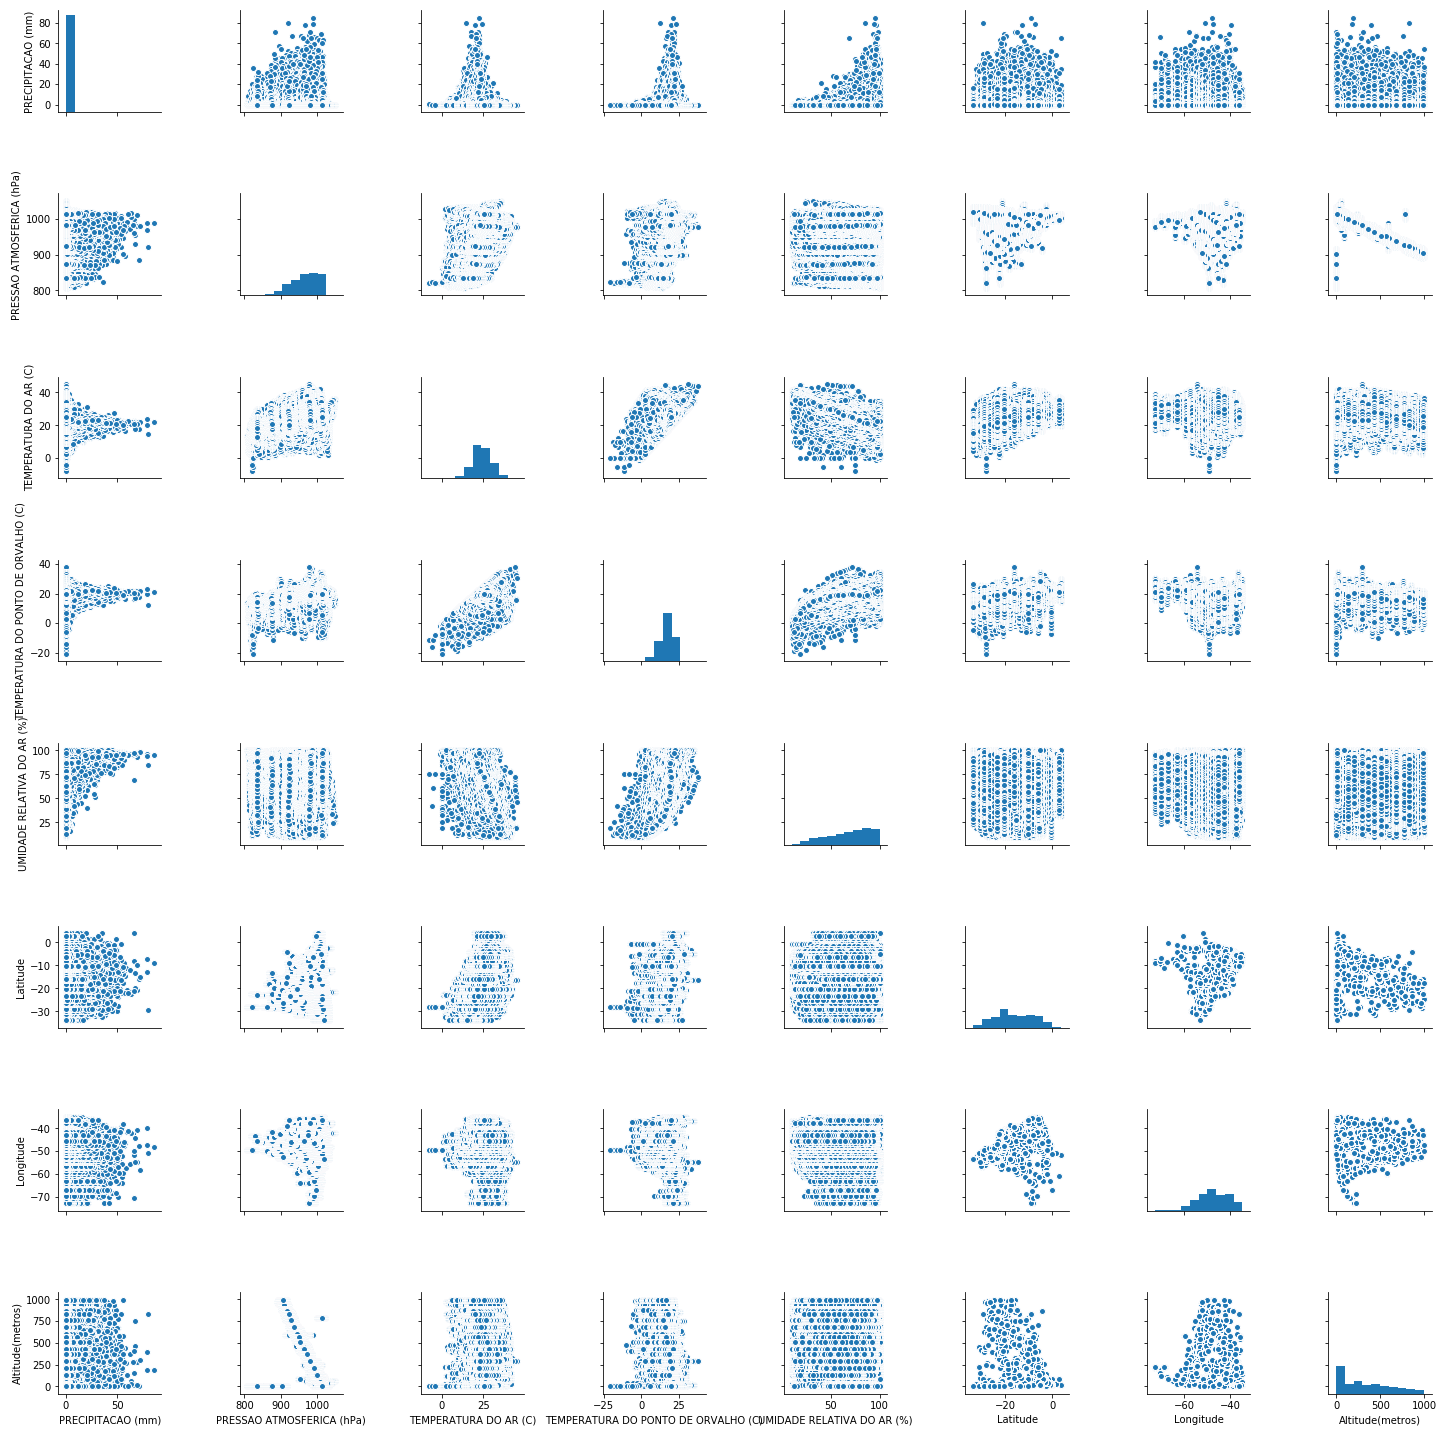

In [41]:
sns.pairplot(data[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)','TEMPERATURA DO PONTO DE ORVALHO (C)',
                   'UMIDADE RELATIVA DO AR (%)','Latitude','Longitude','Altitude(metros)']].dropna(),)

#### Como podemos ver existe alguns dados fora do padrão dos demais registro, como os dados de Pressão atmosferica que podemos perceber que sua relação com Altidude não esta muito correta. iremos retirar este dados também

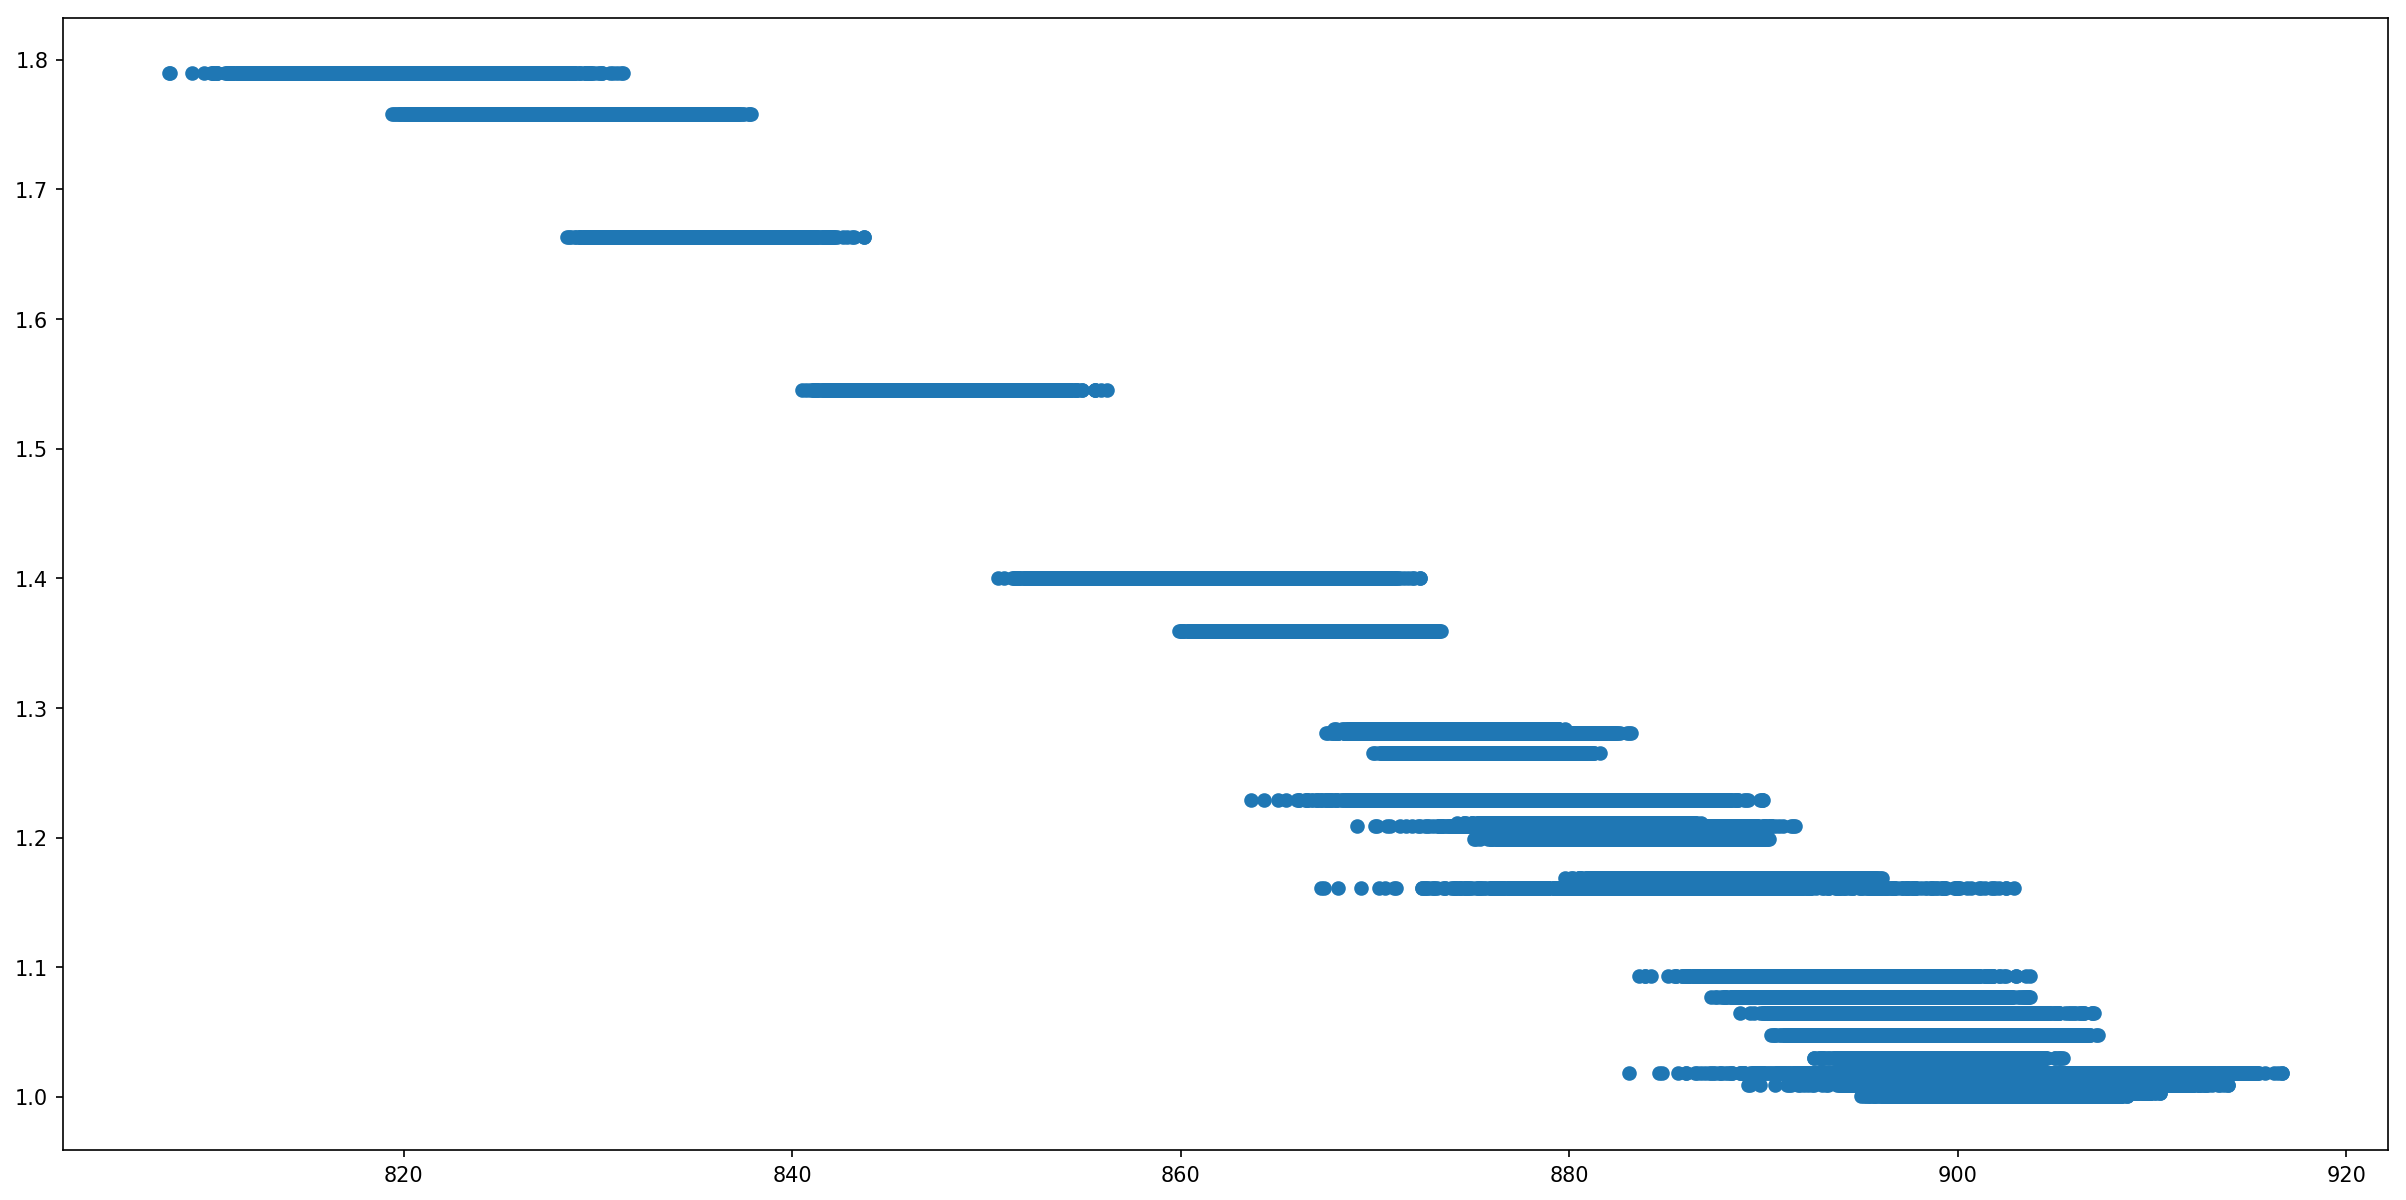

In [43]:
plt.figure(figsize=(20, 10), dpi=150)
plt.scatter(data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<930),:]['PRESSAO ATMOSFERICA (hPa)'],
           data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<930),:]['Altitude(metros)'])


In [44]:
data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<930),:].head(10)

Altitude(metros)  Codigo OMM  Day  H(UTC)   Latitude  Longitude  \
399240             1.161     86715.0    1       0 -15.789343 -47.925756   
399241             1.161     86715.0    1       1 -15.789343 -47.925756   
399242             1.161     86715.0    1       2 -15.789343 -47.925756   
399243             1.161     86715.0    1       3 -15.789343 -47.925756   
399244             1.161     86715.0    1       4 -15.789343 -47.925756   
399245             1.161     86715.0    1       5 -15.789343 -47.925756   
399246             1.161     86715.0    1       6 -15.789343 -47.925756   
399247             1.161     86715.0    1       7 -15.789343 -47.925756   
399248             1.161     86715.0    1       8 -15.789343 -47.925756   
399249             1.161     86715.0    1       9 -15.789343 -47.925756   

        Month           Nome  PRECIPITACAO (mm)  PRESSAO ATMOSFERICA (hPa)  \
399240     10  Brasília-A001                0.0                      888.3   
399241     10  Brasília-A001                0.0                      888.9   
399242     10  Brasília-A001                0.0                      889.1   
399243     10  Brasília-A001                0.0                      889.0   
399244     10  Brasília-A001                0.0                      888.6   
399245     10  Brasília-A001                0.0                      888.2   
399246     10  Brasília-A001                0.0                      887.8   
399247     10  Brasília-A001                0.0                      887.8   
399248     10  Brasília-A001                0.0                      888.2   
399249     10  Brasília-A001                0.0                      888.7   

        PRESSAO ATMOSFÉRICA MAXIMA (hPa)  PRESSAO ATMOSFÉRICA MINIMA (hPa)  \
399240                             888.3                             887.7   
399241                             888.9                             888.3   
399242                             889.1                             888.9   
399243                             889.1                             888.9   
399244                             889.0                             888.6   
399245                             888.6                             888.2   
399246                             888.2                             887.7   
399247                             887.8                             887.7   
399248                             888.2                             887.8   
399249                             888.7                             888.2   

        RADIACAO GLOBAL (KJ/M2)  TEMPERATURA DO AR (C)  \
399240                      NaN                   21.7   
399241                      NaN                   21.2   
399242                      NaN                   20.3   
399243                      NaN                   19.8   
399244                      NaN                   19.5   
399245                      NaN                   18.7   
399246                      NaN                   17.8   
399247                      NaN                   17.8   
399248                      NaN                   17.7   
399249                      NaN                   17.6   

        TEMPERATURA DO PONTO DE ORVALHO (C)  TEMPERATURA MAXIMA (C)  \
399240                                 10.6                    22.4   
399241                                 11.0                    21.7   
399242                                 11.4                    21.1   
399243                                 11.6                    20.3   
399244                                 11.6                    19.9   
399245                                 11.9                    19.4   
399246                                 12.1                    18.7   
399247                                 11.9                    17.9   
399248                                 12.1                    18.0   
399249                                 11.7                    17.7   

        TEMPERATURA MINIMA (C)  TEMPERATURA

In [45]:
errors = data.loc[(data['Altitude(metros)']>0) & (data['Altitude(metros)']<260)&(data['PRESSAO ATMOSFERICA (hPa)']<930),:].index.tolist()
print('Numero de resgitros que serão retirados: {}'.format(len(errors)))
data.loc[errors,'PRESSAO ATMOSFERICA (hPa)'] = np.nan

Numero de resgitros que serão retirados: 172140


In [46]:
(data.isnull().sum()/len(data))*100

Altitude(metros)                               0.000000
Codigo OMM                                     0.023634
Day                                            0.000000
H(UTC)                                         0.000000
Latitude                                       0.000000
Longitude                                      0.000000
Month                                          0.000000
Nome                                           0.000000
PRECIPITACAO (mm)                              9.044900
PRESSAO ATMOSFERICA (hPa)                     12.781863
PRESSAO ATMOSFÉRICA MAXIMA (hPa)               7.342413
PRESSAO ATMOSFÉRICA MINIMA (hPa)               7.342318
RADIACAO GLOBAL (KJ/M2)                       50.767602
TEMPERATURA DO AR (C)                          6.984057
TEMPERATURA DO PONTO DE ORVALHO (C)            7.663127
TEMPERATURA MAXIMA (C)                         6.997177
TEMPERATURA MINIMA (C)                         7.000639
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     7

## Retirando os dados ausentes

### por trabalhamos com medias não iremos fazer recuperação dos dados ausentes apenas discarta-los.
### mas primeiro iremos descarta o atribulto de radiação global, que ja ele esta ausente em 50% da base

In [47]:
data.drop(columns=['RADIACAO GLOBAL (KJ/M2)','VENTO VELOCIDADE ','VENTO, DIRECAO (graus)','VENTO, RAJADA MAXIMA (m/s)'],inplace=True)

In [48]:
data.dropna(inplace=True)

In [49]:
data.to_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_data_clean_v2.csv')

In [50]:
data.describe().T

count          mean  \
Altitude(metros)                            2651813.0    371.302325   
Codigo OMM                                  2651813.0  85288.604816   
Day                                         2651813.0     16.046630   
H(UTC)                                      2651813.0     11.557514   
Latitude                                    2651813.0    -15.641642   
Longitude                                   2651813.0    -47.583313   
Month                                       2651813.0     10.000000   
PRECIPITACAO (mm)                           2651813.0      0.131625   
PRESSAO ATMOSFERICA (hPa)                   2651813.0    970.784993   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            2651813.0    971.098782   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            2651813.0    970.478417   
TEMPERATURA DO AR (C)                       2651813.0     24.675437   
TEMPERATURA DO PONTO DE ORVALHO (C)         2651813.0     17.162988   
TEMPERATURA MAXIMA (C)                      2651813.0     25.345015   
TEMPERATURA MINIMA (C)                      2651813.0     24.043540   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  2651813.0     17.708386   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  2651813.0     16.639028   
UMIDADE RELATIVA DO AR (%)                  2651813.0     67.392952   
UMIDADE RELATIVA DO MAXIMA AR (%)           2651813.0     70.212852   
UMIDADE RELATIVA DO MINIMA AR (%)           2651813.0     64.522720   
Year                                        2651813.0   2010.864941   

                                                    std           min  \
Altitude(metros)                             284.637164      2.000000   
Codigo OMM                                  2288.537637  81609.000000   
Day                                            8.951537      1.000000   
H(UTC)                                         6.927001      0.000000   
Latitude                                       8.220657    -33.742297   
Longitude                                      6.936591    -72.786778   
Month                                          0.000000     10.000000   
PRECIPITACAO (mm)                              1.149906      0.000000   
PRESSAO ATMOSFERICA (hPa)                     31.605798    890.600000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              31.614050    891.600000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              31.597962    890.500000   
TEMPERATURA DO AR (C)                          5.374118      2.100000   
TEMPERATURA DO PONTO DE ORVALHO (C)            4.174424     -7.100000   
TEMPERATURA MAXIMA (C)                         5.545076      2.300000   
TEMPERATURA MINIMA (C)                         5.197624      1.500000   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     4.078085     -5.200000   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     4.280426     -9.900000   
UMIDADE RELATIVA DO AR (%)                    21.200087     10.000000   
UMIDADE RELATIVA DO MAXIMA AR (%)             20.546212     10.000000   
UMIDADE RELATIVA DO MINIMA AR (%)             21.651343     10.000000   
Year                                           2.928439   2000.000000   

                                                     25%           50%  \
Altitude(metros)                              104.000000    334.000000   
Codigo OMM                                  81957.000000  86722.000000   
Day                                             8.000000     16.000000   
H(UTC)                                          6.000000     12.000000   
Latitude                                      -22.193920    -15.902658   
Longitude                                     -52.403582    -48.111839   
Month                                          10.000000     10.000000   
PRECIPITACAO (mm)                               0.000000      0.000000   
PRESSAO ATMOSFERICA (hPa)                     947.900000    974.100000   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              948.200000    974.400000   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              947.600000    973.

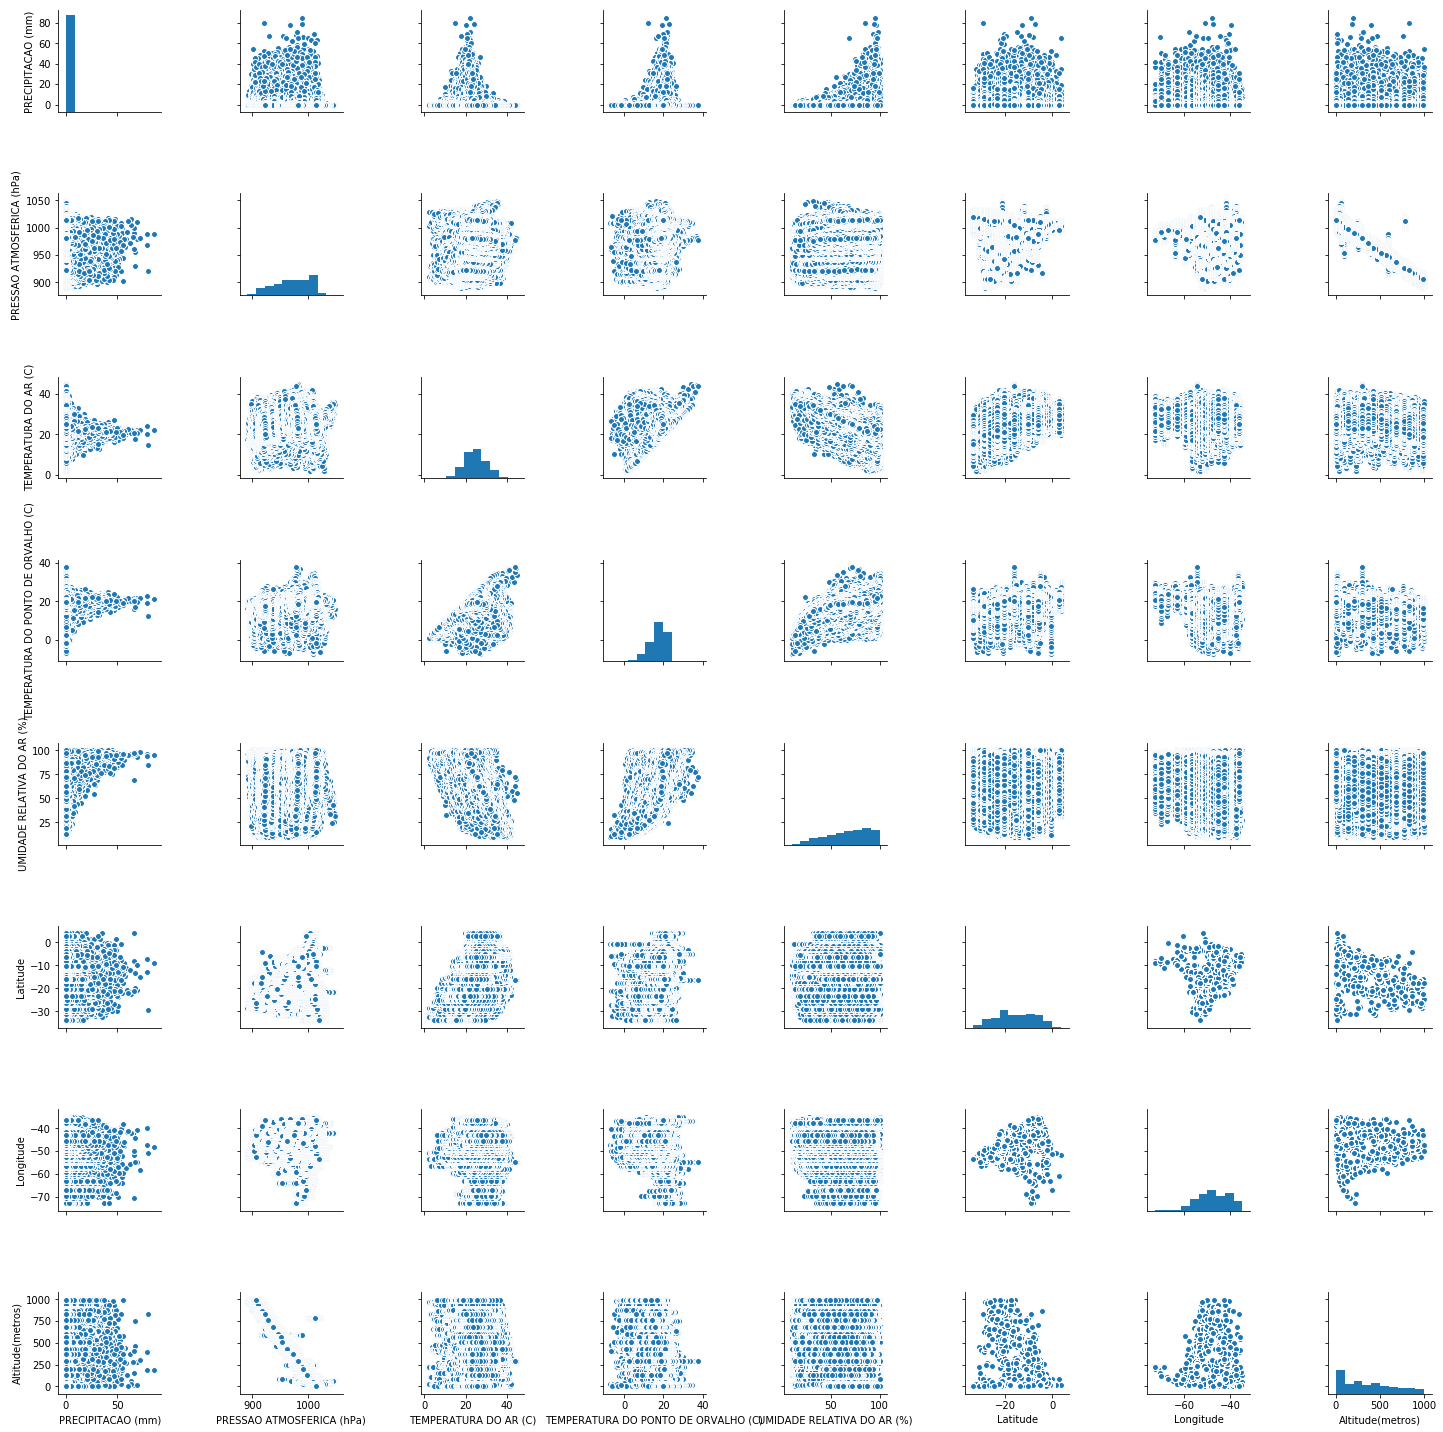

In [51]:
sns.pairplot(data[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)','TEMPERATURA DO PONTO DE ORVALHO (C)',
                   'UMIDADE RELATIVA DO AR (%)','Latitude','Longitude','Altitude(metros)']].dropna(),)

### Fazendo a base de dados com as medias mensais de cada estação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
month_num = str(10)
data = pd.read_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_data_clean_v2.csv').drop(columns=['Unnamed: 0'])
data.head(6)

Altitude(metros)  Codigo OMM  Day  H(UTC)  Latitude  Longitude  Month  \
0             185.0     81963.0    1       0 -9.358353 -69.926257     10   
1             185.0     81963.0    1       1 -9.358353 -69.926257     10   
2             185.0     81963.0    1       2 -9.358353 -69.926257     10   
3             185.0     81963.0    1       3 -9.358353 -69.926257     10   
4             185.0     81963.0    1       4 -9.358353 -69.926257     10   
5             185.0     81963.0    1       6 -9.358353 -69.926257     10   

                             Nome  PRECIPITACAO (mm)  \
0  Parque Estadual Chandless-A102                0.0   
1  Parque Estadual Chandless-A102                0.0   
2  Parque Estadual Chandless-A102                0.0   
3  Parque Estadual Chandless-A102                0.0   
4  Parque Estadual Chandless-A102                0.0   
5  Parque Estadual Chandless-A102                0.0   

   PRESSAO ATMOSFERICA (hPa)   ...    TEMPERATURA MINIMA (C)  \
0                      989.2   ...                      23.3   
1                      990.4   ...                      23.0   
2                      991.1   ...                      22.9   
3                      991.2   ...                      23.0   
4                      991.1   ...                      22.9   
5                      990.2   ...                      22.2   

   TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
0                                        22.9   
1                                        22.7   
2                                        22.5   
3                                        22.6   
4                                        22.3   
5                                        21.9   

   TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  UMIDADE RELATIVA DO AR (%)  \
0                                        22.5                        95.0   
1                                        22.2                        95.0   
2                                        22.1                        95.0   
3                                        22.1                        92.0   
4                                        22.1                        95.0   
5                                        21.5                        96.0   

   UMIDADE RELATIVA DO MAXIMA AR (%)  UMIDADE RELATIVA DO MINIMA AR (%)  Year  \
0                               95.0                               94.0  2008   
1                               96.0                               95.0  2008   
2                               96.0                               95.0  2008   
3                               96.0                               92.0  2008   
4                               95.0                               92.0  2008   
5                               96.0                               95.0  2008   

                      Cidade  Estado  Regiao  
0  Parque Estadual Chandless    Acre   Norte  
1  Parque Estadual Chandless    Acre   Norte  
2  Parque Estadual Chandless    Acre   Norte  
3  Parque Estadual Chandless    Acre   Norte  
4  Parque Estadual Chandless    Acre   Norte  
5  Parque Estadual Chandless    Acre   Norte  

[6 rows x 25 columns]

In [2]:
data_mean = data.groupby(['Nome']).agg('mean')
data_mean.to_csv('./Tempo-Clima/Dados/Brasil_'+month_num+'_mean.csv')
data_mean.head(5)

Altitude(metros)  Codigo OMM        Day     H(UTC)  \
Nome                                                                      
Abrolhos-A422                    21.0     86765.0  15.918476  11.519055   
Acaraú-A360                      67.0     81755.0  16.028356  11.518326   
Afonso Cláudio-A657             507.0     86827.0  15.926426  11.609810   
Aimorés-A534                    288.0     86803.0  16.513788  11.550556   
Alegre-A617                     129.0     86828.0  16.263014  11.545662   

                      Latitude  Longitude  Month  PRECIPITACAO (mm)  \
Nome                                                                  
Abrolhos-A422       -17.963016 -38.703288   10.0           0.119344   
Acaraú-A360          -3.121067 -40.087288   10.0           0.000617   
Afonso Cláudio-A657 -20.104194 -41.106861   10.0           0.075889   
Aimorés-A534        -19.532768 -41.090801   10.0           0.127979   
Alegre-A617         -20.750412 -41.488852   10.0           0.143135   

                     PRESSAO ATMOSFERICA (hPa)  \
Nome                                             
Abrolhos-A422                      1013.651423   
Acaraú-A360                        1003.880999   
Afonso Cláudio-A657                 957.535271   
Aimorés-A534                        987.850782   
Alegre-A617                         999.774597   

                     PRESSAO ATMOSFÉRICA MAXIMA (hPa)     ...       \
Nome                                                      ...        
Abrolhos-A422                             1013.933478     ...        
Acaraú-A360                               1004.167284     ...        
Afonso Cláudio-A657                        957.810554     ...        
Aimorés-A534                               988.149202     ...        
Alegre-A617                               1000.073212     ...        

                     TEMPERATURA DO AR (C)  \
Nome                                         
Abrolhos-A422                    24.725036   
Acaraú-A360                      27.187847   
Afonso Cláudio-A657              22.239322   
Aimorés-A534                     24.529382   
Alegre-A617                      24.419269   

                     TEMPERATURA DO PONTO DE ORVALHO (C)  \
Nome                                                       
Abrolhos-A422                                  20.279064   
Acaraú-A360                                    20.242843   
Afonso Cláudio-A657                            15.479361   
Aimorés-A534                                   17.140526   
Alegre-A617                                    17.383866   

                     TEMPERATURA MAXIMA (C)  TEMPERATURA MINIMA (C)  \
Nome                                                                  
Abrolhos-A422                     25.052340               24.419682   
Acaraú-A360                       27.854861               26.595313   
Afonso Cláudio-A657               22.926564               21.641279   
Aimorés-A534                      25.195597               23.946734   
Alegre-A617                       25.080913               23.799498   

                     TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  \
Nome                                                              
Abrolhos-A422                                         20.716667   
Acaraú-A360                                           20.660667   
Afonso Cláudio-A657                                   15.964481   
Aimorés-A534                                          17.578455   
Alegre-A617                                           17.900167   

                     TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  \
Nome                                                              
Abrolhos-A422                                         19.849590   
Acaraú-A360                                           19.810667   
Afonso Cláudio-A657                                   15.003196   
Aimorés-A534                                          16.709353   
Alegre-A617                              

In [5]:
data_mean['Precipitação Acum.(mm)'] = data.groupby(['Nome','Year']).agg('sum').groupby('Nome').agg('mean')['PRECIPITACAO (mm)']

data_mean.to_csv('./Tempo-Clima/Dados/Brasil_10_mean.csv')

In [6]:
data_mean.describe().T

count          mean          std  \
Altitude(metros)                            458.0    365.521834   282.831588   
Codigo OMM                                  458.0  85201.056769  2325.371846   
Day                                         458.0     16.061867     0.290188   
H(UTC)                                      458.0     11.560298     0.110060   
Latitude                                    458.0    -15.371909     8.276341   
Longitude                                   458.0    -48.015097     7.263208   
Month                                       458.0     10.000000     0.000000   
PRECIPITACAO (mm)                           458.0      0.131662     0.078302   
PRESSAO ATMOSFERICA (hPa)                   458.0    971.318067    31.162328   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)            458.0    971.631985    31.171819   
PRESSAO ATMOSFÉRICA MINIMA (hPa)            458.0    971.010566    31.154253   
TEMPERATURA DO AR (C)                       458.0     24.787277     3.360425   
TEMPERATURA DO PONTO DE ORVALHO (C)         458.0     17.259787     2.931861   
TEMPERATURA MAXIMA (C)                      458.0     25.460505     3.411434   
TEMPERATURA MINIMA (C)                      458.0     24.151605     3.312872   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)  458.0     17.809413     2.904512   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)  458.0     16.731545     2.962191   
UMIDADE RELATIVA DO AR (%)                  458.0     67.394833    10.752496   
UMIDADE RELATIVA DO MAXIMA AR (%)           458.0     70.232691    10.646891   
UMIDADE RELATIVA DO MINIMA AR (%)           458.0     64.508254    10.811372   
Year                                        458.0   2011.181547     1.201445   
Precipitação Acum.(mm)                      458.0     92.701320    55.615575   

                                                     min           25%  \
Altitude(metros)                                2.000000    108.250000   
Codigo OMM                                  81609.000000  81950.250000   
Day                                            15.217968     15.976132   
H(UTC)                                         11.120285     11.512070   
Latitude                                      -33.742297    -21.949157   
Longitude                                     -72.786778    -52.955566   
Month                                          10.000000     10.000000   
PRECIPITACAO (mm)                               0.000000      0.073523   
PRESSAO ATMOSFERICA (hPa)                     903.264795    949.499793   
PRESSAO ATMOSFÉRICA MAXIMA (hPa)              903.536344    949.811199   
PRESSAO ATMOSFÉRICA MINIMA (hPa)              902.996984    949.191353   
TEMPERATURA DO AR (C)                          15.380845     23.136882   
TEMPERATURA DO PONTO DE ORVALHO (C)            11.459135     14.773931   
TEMPERATURA MAXIMA (C)                         15.942010     23.754457   
TEMPERATURA MINIMA (C)                         14.868564     22.497201   
TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)     12.041271     15.347268   
TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)     10.917662     14.237678   
UMIDADE RELATIVA DO AR (%)                     36.780605     60.756169   
UMIDADE RELATIVA DO MAXIMA AR (%)              38.777714     63.722175   
UMIDADE RELATIVA DO MINIMA AR (%)              34.786389     57.548358   
Year                                         2007.613196   2010.659632   
Precipitação Acum.(mm)                          0.000000     51.712500   

                                                     50%           75%  \
Altitude(metros)                              318.500000    557.250000   
Codigo OMM                                  86710.000000  86854.750000   
Day                                            16.022788     16.121040   
H(UTC)                                         11.524020     11.581455   
Latitude                                      -15.290187     -8.505388   
Longitude                                     -48.228444

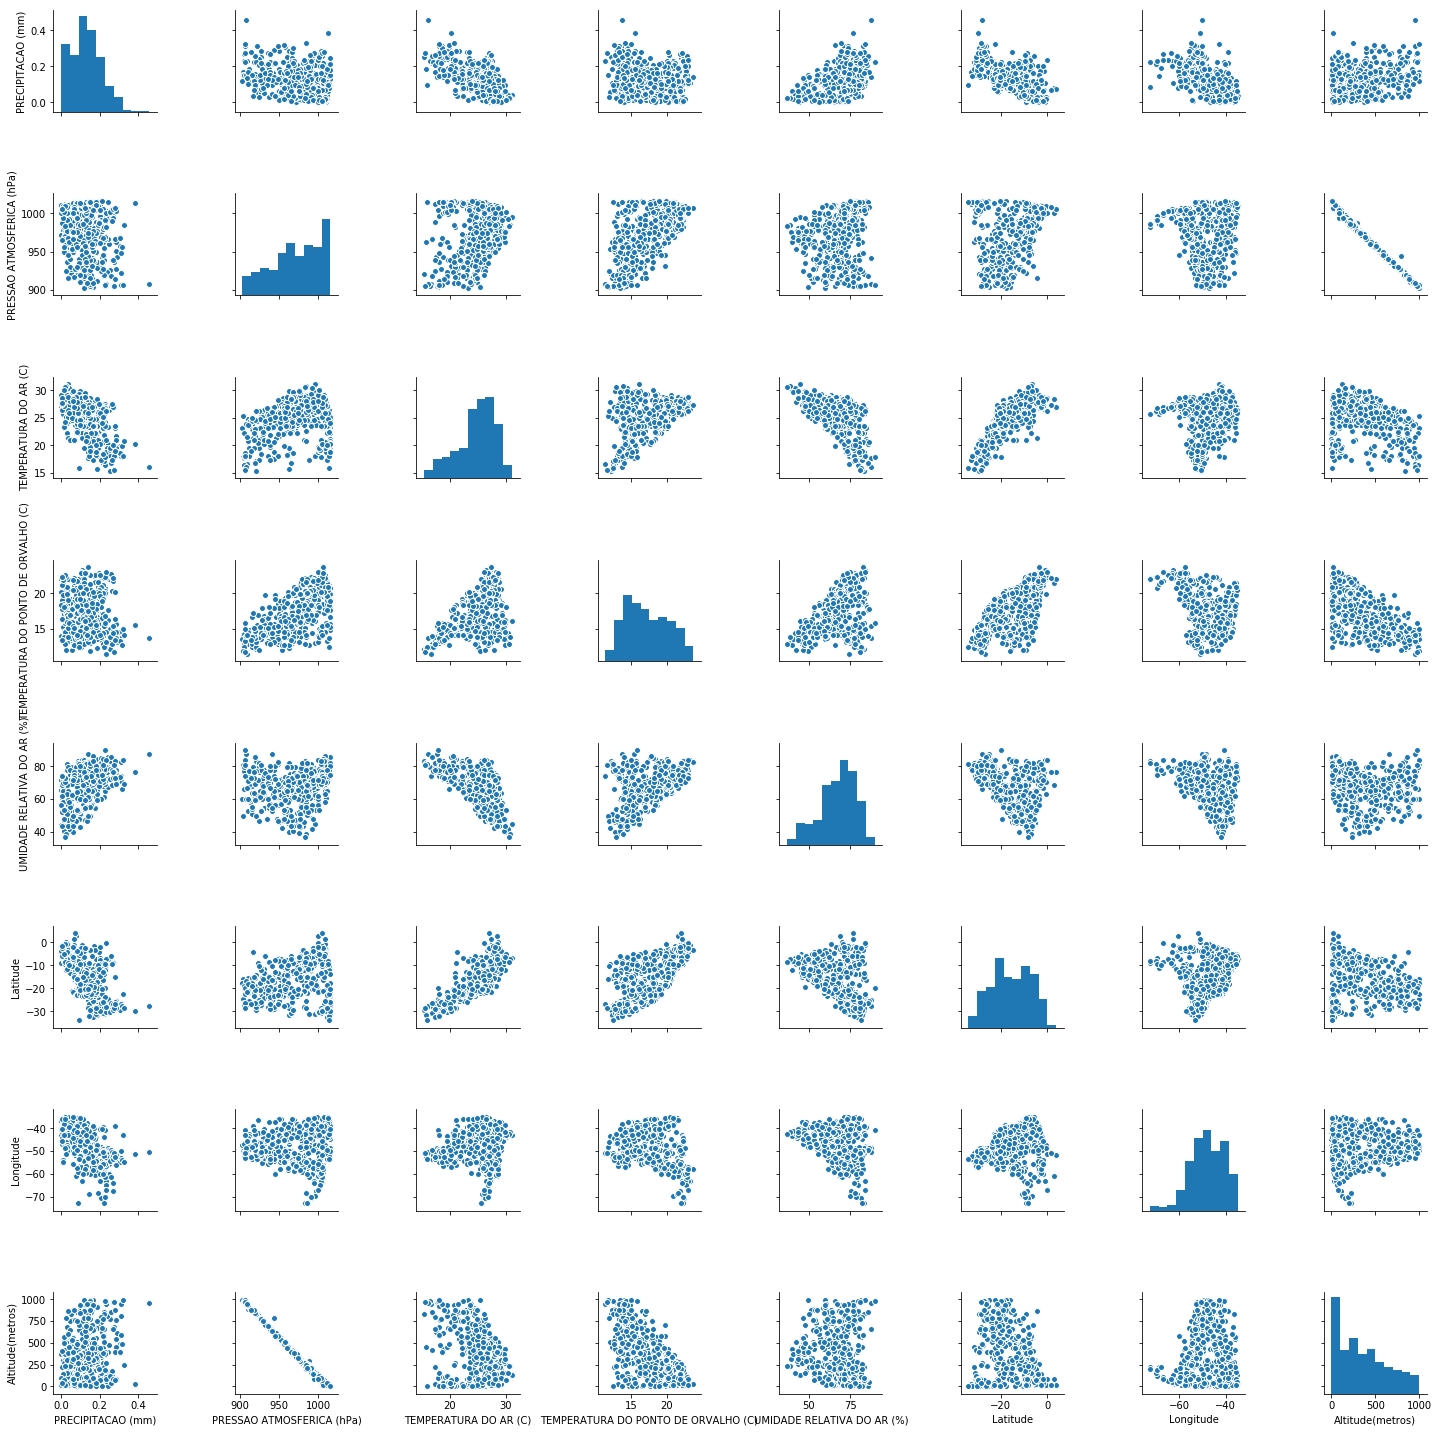

In [54]:
sns.pairplot(data_mean[['PRECIPITACAO (mm)','PRESSAO ATMOSFERICA (hPa)','TEMPERATURA DO AR (C)',
                  'TEMPERATURA DO PONTO DE ORVALHO (C)','UMIDADE RELATIVA DO AR (%)','Latitude',
                  'Longitude','Altitude(metros)']])

In [55]:
target_wanderlay = ['UMIDADE RELATIVA DO AR (%)']
features_UR_wanderlay = data_mean.columns.tolist()
features_UR_wanderlay.remove('Day')
features_UR_wanderlay.remove('Month')
features_UR_wanderlay.remove('Codigo OMM')
features_UR_wanderlay.remove('Year')
features_UR_wanderlay.remove('H(UTC)')
#features_UR_wanderlay.remove('VENTO VELOCIDADE ')
#features_UR_wanderlay.remove('VENTO, DIRECAO (graus)')
#features_UR_wanderlay.remove('VENTO, RAJADA MAXIMA (m/s)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO AR (%)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO MINIMA AR (%)')
features_UR_wanderlay.remove('UMIDADE RELATIVA DO MAXIMA AR (%)')
features_UR_wanderlay.remove('TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA DO PONTO DE ORVALHO (C)')
features_UR_wanderlay.remove('TEMPERATURA DO AR (C)')
#features_UR_wanderlay.remove('TEMPERATURA MAXIMA (C)')
#features_UR_wanderlay.remove('TEMPERATURA MINIMA (C)')
features_UR_wanderlay.remove('PRECIPITACAO (mm)')
features_UR_wanderlay.remove('PRESSAO ATMOSFERICA (hPa)')
features_UR_wanderlay.remove('PRESSAO ATMOSFÉRICA MAXIMA (hPa)')
features_UR_wanderlay.remove('PRESSAO ATMOSFÉRICA MINIMA (hPa)')




features_UR_wanderlay

['Altitude(metros)',
 'Latitude',
 'Longitude',
 'TEMPERATURA MAXIMA (C)',
 'TEMPERATURA MINIMA (C)']

In [56]:
from sklearn.model_selection import train_test_split

X_ur_train, X_ur_test, y_ur_train, y_ur_test = train_test_split(data_mean[features_UR_wanderlay], data_mean[target_wanderlay],test_size=.25)

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(-0.8,0.8))
scaler_y = MinMaxScaler(feature_range=(-0.8,0.8))

scaler_x.fit(X_ur_train)
X_ur_train = scaler_x.transform(X_ur_train)
X_ur_test  = scaler_x.transform(X_ur_test)

scaler_y.fit(y_ur_train)
y_ur_train = scaler_y.transform(y_ur_train)
y_ur_test  = scaler_y.transform(y_ur_test)

In [58]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='adam', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_ur_train,y_ur_train.ravel())
y_ur_pred = mlp.predict(X_ur_test)


In [59]:
import sklearn.metrics as metrics
print('Variance: {}'.format(metrics.explained_variance_score(scaler_y.inverse_transform(y_ur_test).ravel(),scaler_y.inverse_transform([y_ur_pred,]).ravel())))
print('Erro absoluto medio: {}'.format(metrics.mean_absolute_error(scaler_y.inverse_transform(y_ur_test).ravel(),scaler_y.inverse_transform([y_ur_pred,]).ravel())))
print('Erro quadrado medio: {}'.format(metrics.mean_squared_error(scaler_y.inverse_transform(y_ur_test).ravel(),scaler_y.inverse_transform([y_ur_pred,]).ravel())))
print('Erro absoluto mediano: {}'.format(metrics.median_absolute_error(scaler_y.inverse_transform(y_ur_test).ravel(),scaler_y.inverse_transform([y_ur_pred,]).ravel())))
print('R2 Score: {}'.format(metrics.r2_score(scaler_y.inverse_transform(y_ur_test).ravel(),scaler_y.inverse_transform([y_ur_pred,]).ravel())))

Variance: 0.9002863731539764
Erro absoluto medio: 2.523173347253705
Erro quadrado medio: 10.47313741775345
Erro absoluto mediano: 2.1057265385474295
R2 Score: 0.8989963307262478


In [60]:
errors=abs(scaler_y.inverse_transform(y_ur_test).ravel()-scaler_y.inverse_transform([y_ur_pred,]))
print('Error(UR_true - UR_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Error(UR_true - UR_pred)
MIN: 0.10450470168333936 	MAX: 12.925261335125242 	MEAN: 2.523173347253705	Std: 2.026507754108527


In [61]:
df_rest = pd.DataFrame(data = scaler_y.inverse_transform(y_ur_test).ravel(),columns=['Y_true'])
df_rest['Y_pred'] = scaler_y.inverse_transform([y_ur_pred,]).ravel()
df_rest.sort_values(['Y_pred','Y_true']).head(5)

Y_true     Y_pred
2   36.780605  41.964742
82  45.472000  42.557801
32  42.881213  44.989291
80  46.430441  45.666935
49  45.288443  47.497375

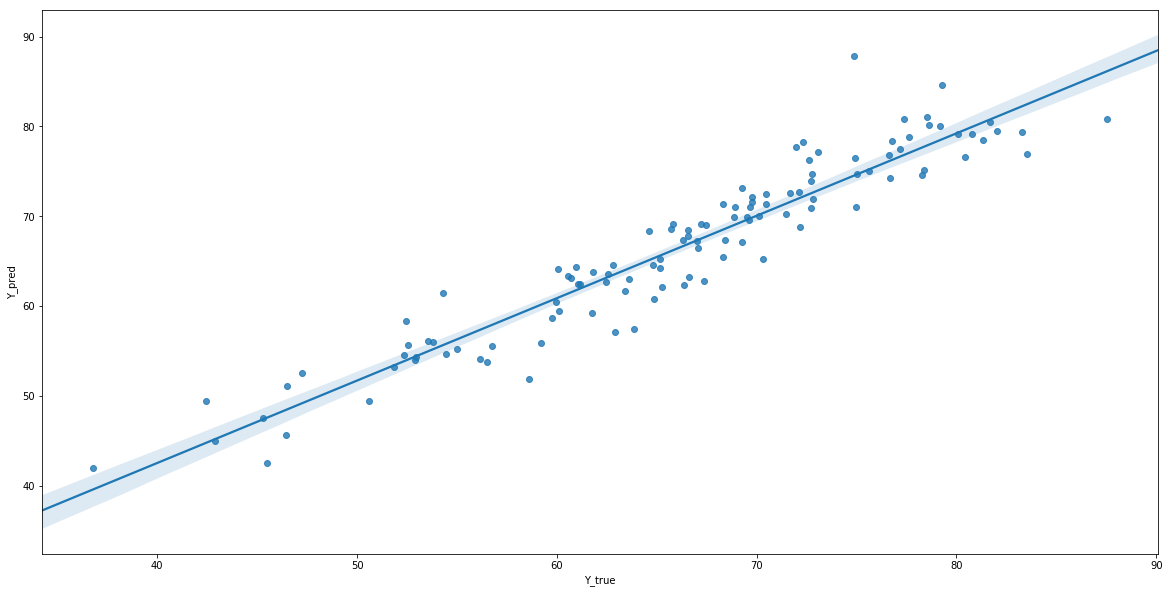

In [62]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(x="Y_true", y="Y_pred", data=df_rest,ax=ax)

In [63]:
target_tmin = ['TEMPERATURA MINIMA (C)']
features_tmin = data_mean.columns.tolist()
features_tmin.remove('Day')
features_tmin.remove('Month')
features_tmin.remove('Codigo OMM')
features_tmin.remove('Year')
features_tmin.remove('H(UTC)')
features_tmin.remove('UMIDADE RELATIVA DO AR (%)')
#features_tmin.remove('UMIDADE RELATIVA DO MINIMA AR (%)')
#features_tmin.remove('UMIDADE RELATIVA DO MAXIMA AR (%)')
features_tmin.remove('TEMPERATURA MÍNIMA DO PONTO DE ORVALHO (C)')
features_tmin.remove('TEMPERATURA MÁXIMA DO PONTO DE ORVALHO (C)')
features_tmin.remove('TEMPERATURA DO PONTO DE ORVALHO (C)')
features_tmin.remove('TEMPERATURA DO AR (C)')
features_tmin.remove('TEMPERATURA MAXIMA (C)')
features_tmin.remove('TEMPERATURA MINIMA (C)')
features_tmin.remove('PRECIPITACAO (mm)')
features_tmin.remove('PRESSAO ATMOSFERICA (hPa)')
features_tmin.remove('PRESSAO ATMOSFÉRICA MAXIMA (hPa)')
features_tmin.remove('PRESSAO ATMOSFÉRICA MINIMA (hPa)')
features_tmin

['Altitude(metros)',
 'Latitude',
 'Longitude',
 'UMIDADE RELATIVA DO MAXIMA AR (%)',
 'UMIDADE RELATIVA DO MINIMA AR (%)']

In [64]:
from sklearn.model_selection import train_test_split

X_tmin_train, X_tmin_test, y_tmin_train, y_tmin_test = train_test_split(data_mean[features_UR_wanderlay], data_mean[target_wanderlay],test_size=.25)

In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(-0.8,0.8))
scaler_y = MinMaxScaler(feature_range=(-0.8,0.8))

scaler_x.fit(X_tmin_train)
X_tmin_train = scaler_x.transform(X_tmin_train)
X_tmin_test  = scaler_x.transform(X_tmin_test)

scaler_y.fit(y_tmin_train)
y_tmin_train = scaler_y.transform(y_tmin_train)
y_tmin_test  = scaler_y.transform(y_tmin_test)

In [66]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features_UR_wanderlay)+1), activation='logistic', solver='adam', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_tmin_train,y_tmin_train.ravel())
y_tmin_pred = mlp.predict(X_tmin_test)


In [67]:
import sklearn.metrics as metrics
print('Variance: {}'.format(metrics.explained_variance_score(scaler_y.inverse_transform(y_tmin_test).ravel(),scaler_y.inverse_transform([y_tmin_pred,]).ravel())))
print('Erro absoluto medio: {}'.format(metrics.mean_absolute_error(scaler_y.inverse_transform(y_tmin_test).ravel(),scaler_y.inverse_transform([y_tmin_pred,]).ravel())))
print('Erro quadrado medio: {}'.format(metrics.mean_squared_error(scaler_y.inverse_transform(y_tmin_test).ravel(),scaler_y.inverse_transform([y_tmin_pred,]).ravel())))
print('Erro absoluto mediano: {}'.format(metrics.median_absolute_error(scaler_y.inverse_transform(y_tmin_test).ravel(),scaler_y.inverse_transform([y_tmin_pred,]).ravel())))
print('R2 Score: {}'.format(metrics.r2_score(scaler_y.inverse_transform(y_tmin_test).ravel(),scaler_y.inverse_transform([y_tmin_pred,]).ravel())))

Variance: 0.9242036775327631
Erro absoluto medio: 2.5087471738452476
Erro quadrado medio: 9.794894656074332
Erro absoluto mediano: 2.1061201505500833
R2 Score: 0.923843563935006


In [68]:
errors=abs(scaler_y.inverse_transform(y_tmin_test).ravel()-scaler_y.inverse_transform([y_tmin_pred,]))
print('Error(tmin_true - tmin_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Error(tmin_true - tmin_pred)
MIN: 0.026411426459247878 	MAX: 7.783459651634423 	MEAN: 2.5087471738452476	Std: 1.871117920869184


In [69]:
df_rest = pd.DataFrame(data = scaler_y.inverse_transform(y_tmin_test).ravel(),columns=['Y_true'])
df_rest['Y_pred'] = scaler_y.inverse_transform([y_tmin_pred,]).ravel()
df_rest.sort_values(['Y_pred','Y_true']).head(5)

Y_true     Y_pred
45  42.881213  46.077255
28  46.406070  46.689152
98  43.238674  46.786004
87  41.922899  47.558090
8   46.399135  48.487257

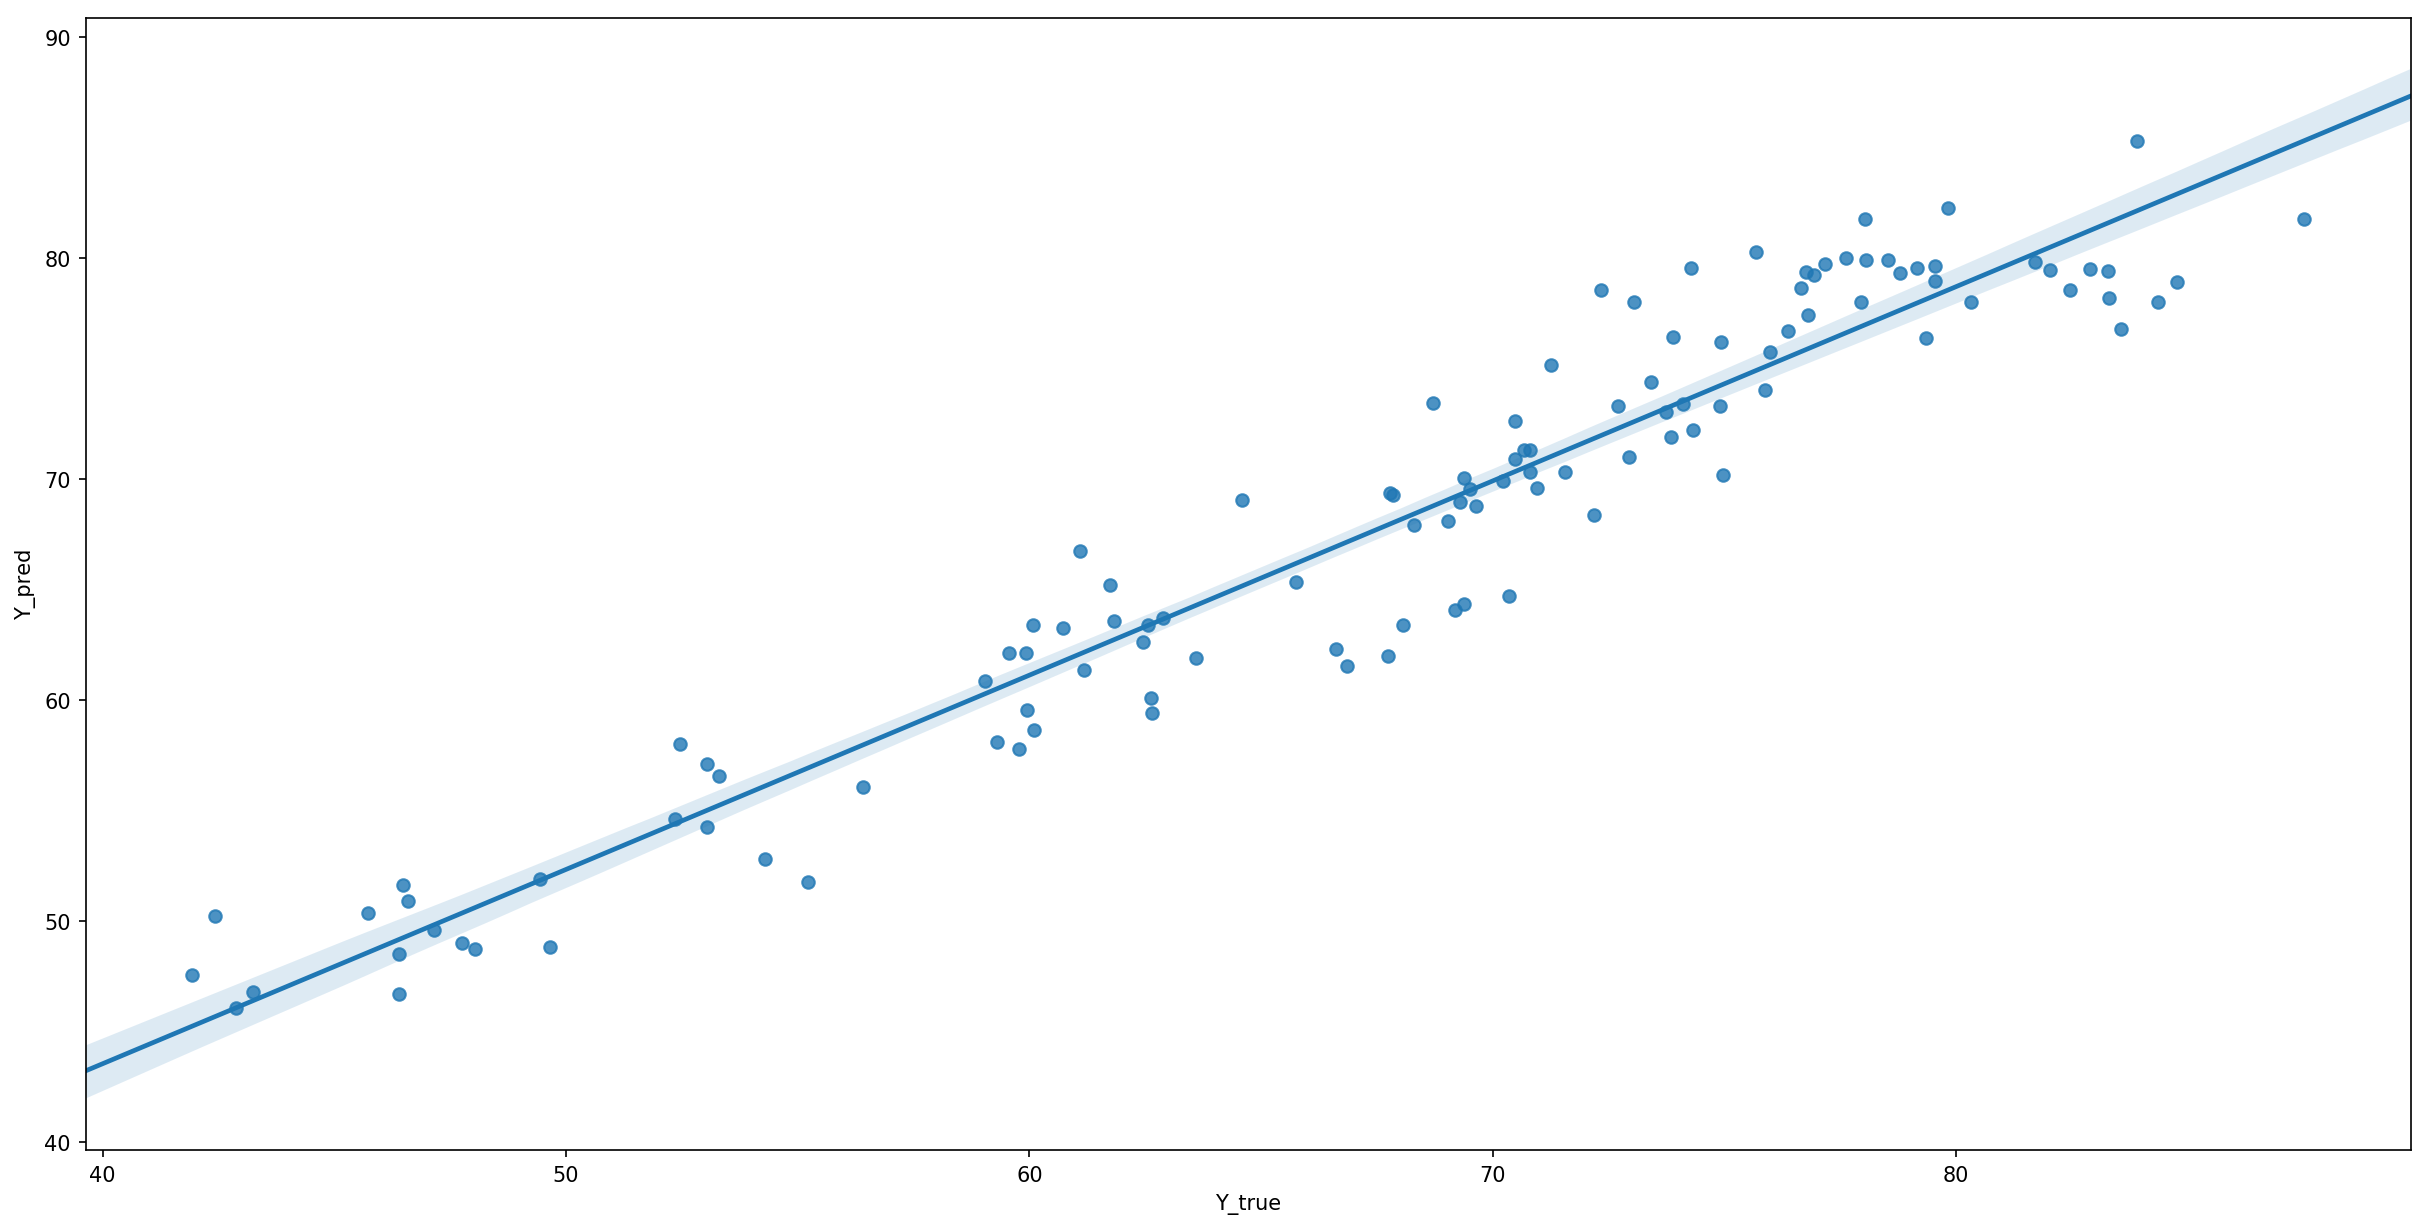

In [70]:
fig,ax = plt.subplots(figsize=(20,10),dpi=150)
sns.regplot(x="Y_true", y="Y_pred", data=df_rest,ax=ax)